# Comprehensive notebook for all plots

### Library imports

In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
import seaborn as sns
sns.set_style("whitegrid")
import networkx as nx
import ndlib.models.ModelConfig as mc
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import os
import pickle
import sys
import future.utils
import ndlib.models.ModelConfig as mc
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
import ndlib.models.opinions as op
from netdispatch.AGraph import AGraph

In [21]:

# mMean field scenario
g = nx.complete_graph(100)
# Algorithmic Bias model
model = op.AlgorithmicBiasMediaModel(g)
# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.32)
config.add_model_parameter("gamma", 0)
config.add_model_parameter("gamma_media", 0)
config.add_model_parameter("p", 0.1)
config.add_model_parameter("k", 1)
model.set_initial_status(config)


In [23]:
iterations = []

In [24]:
def restoiterations(filename):
    iterations = list()
    infile = open(filename, "r")
    lines = infile.readlines()
    for i,line in enumerate(lines):
        opinions = list(line.split(','))
        itdict = {"iteration":i, "status":{k: float(v) for k, v in enumerate(opinions)},"node_count":{0:0},"status_delta":{0:0}}
        iterations.append(itdict)
    return iterations


### Functions

In [29]:
iterations = restoiterations("res/onemedia/media mo[0.0] p0.0 e0.1 g0.0 gm0.0 mi1000000 nr0.csv")
iterations

FileNotFoundError: [Errno 2] No such file or directory: 'res/onemedia/media mo[0.0] p0.0 e0.1 g0.0 gm0.0 mi1000000 nr0.csv'

In [28]:

iterations[-1]['iteration'] + 1

54

In [26]:
len(iterations)

54

No handles with labels found to put in legend.


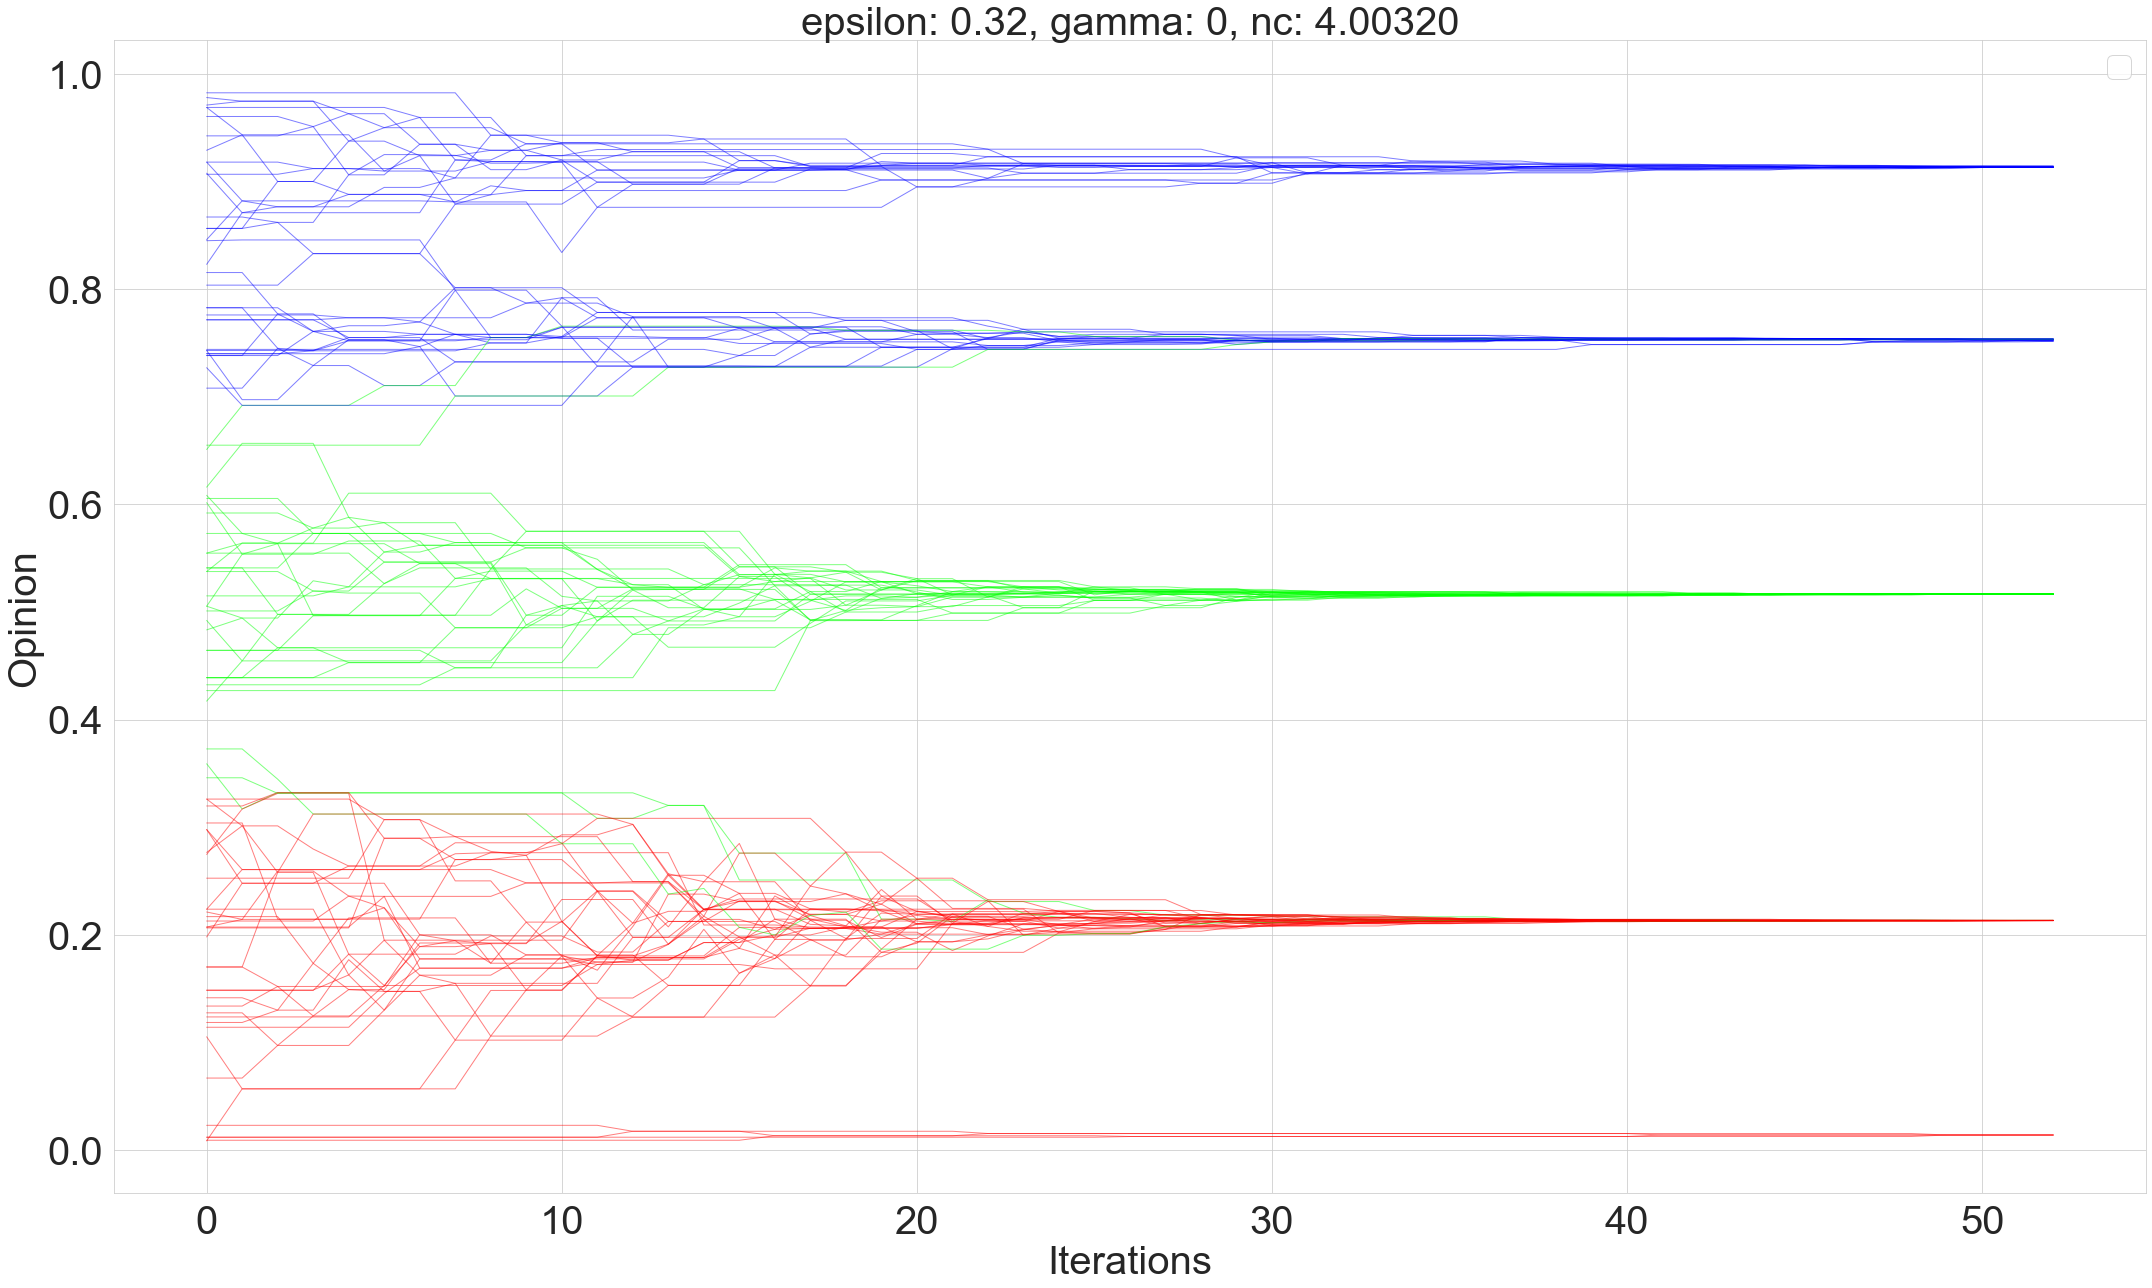

In [27]:
viz = OpinionEvolution(model, iterations)
viz.plot()

In [17]:
%matplotlib inline
viz

In [14]:
def adjust_dataframe(resdf):
    #This function is used to adjust the results I used in the thesis work
    def adjust_val(x):
        #I used different max_iterations so I reduce everything to the minimum max_iterations used
        if x > 1000000:
            x = 1000000
        return x
    return resdf

## Complete 100 nodes network analysis

### Import results files

In [139]:
with open('C:/Users/valen/Documents/Github/2019_Pansanella/datasets/out/mediamodel/csvfiles/media_model_final_final.csv', 'w') as fileout:
    header = ','.join(['graph', 'nruns', 'n', 'density', 'eps', 'gam', 'gam_media', 'p', 'k', 'avg_ncluster', 'avg_pwdist', 'avg_niter', 'std_ncluster', 'std_pwdist', 'std_niter\n'])
    fileout.write(header)
    for filename in os.listdir('C:/Users/valen/Documents/Github/2019_Pansanella/datasets/out/mediamodel/csvfiles'):
        if 'results' in filename:
            filein = open('C:/Users/valen/Documents/Github/2019_Pansanella/datasets/out/mediamodel/csvfiles/{}'.format(filename), 'r')
            s = filein.read()
            fileout.write(s)
    print('end')
            

end


In [140]:
results = pd.read_csv('C:/Users/valen/Documents/Github/2019_Pansanella/datasets/out/mediamodel/csvfiles/media_model_final_final.csv')
# results.columns=['graph', 'nruns', 'n', 'density', 'eps', 'gam', 'gam_media', 'p', 'k', 'avg_ncluster', 'avg_pwdist', 'avg_niter', 'std_ncluster', 'std_pwdist', 'std_niter'] 

In [141]:
len(results[results['nruns']!=100])

38

In [17]:
measures = ['avg_ncluster', 'avg_pwdist', 'avg_niter']
graphs = ['complete']
figsize =(25, 10)

### 3D plots

In [142]:
from matplotlib import rcParams
rcParams['axes.titlepad'] = 35
def trisurfplot(graph, measure, x='eps', y='gam', max_eps=0.0, max_gam=0.0, p=0.1, x_label=r'$\epsilon$', y_label=r'$\gamma$', z_label='Average number of clusters'):
    figsize =(23, 20)
    with sns.axes_style("whitegrid"):
        print(p)
        data = results[results['p']==p]
        data = data[data['eps']<=max_eps]
        data = data[data['gam']<=max_gam]
        
        plt.tight_layout()
        fig = plt.figure(figsize=figsize)
        ax = fig.gca(projection='3d')
        scatter = ax.plot_trisurf(data[x], data[y], data[measure], cmap=plt.get_cmap('RdBu_r'), linewidth=0.2)
        surf=ax.plot_trisurf(data[x], data[y], data[measure], cmap=plt.get_cmap('RdBu_r'), linewidth=0.2)
        cb = fig.colorbar(scatter, shrink=0.5, aspect=50, orientation = 'horizontal', pad=0.05)
        cb.ax.tick_params(labelsize=40)
        ax.set_yticks(list(data.gam.unique()))
        ax.set_xticks(list(data.eps.unique()))
        fig.gca().set_xlabel(x_label, fontsize=55, labelpad=90)    
        fig.gca().set_ylabel(y_label, fontsize=55, labelpad=90)
        fig.gca().set_title('p={}'.format(p), fontsize=60)
        if measure == 'avg_ncluster':
            ax.tick_params(axis='x', which='major', labelsize=35, pad=2, labelrotation=45)
            ax.tick_params(axis='y', which='major', labelsize=35, pad=10, labelrotation=-35)
            ax.tick_params(axis='z', which='major', labelsize=35, pad=10)                  
            ax.set_zlabel(z_label, fontsize=40, labelpad=27)
        elif measure == 'avg_pwdist':
            ax.tick_params(axis='x', which='major', labelsize=35, pad=2, labelrotation=45)
            ax.tick_params(axis='y', which='major', labelsize=35, pad=10, labelrotation=-35)
            ax.tick_params(axis='z', which='major', labelsize=35, pad=15)                 
            ax.set_zlabel(z_label, fontsize=40, labelpad=35)
        elif measure == 'avg_niter':
            ax.tick_params(axis='x', which='major', labelsize=35, pad=2, labelrotation=45)
            ax.tick_params(axis='y', which='major', labelsize=35, pad=10, labelrotation=-35)
            ax.tick_params(axis='z', which='major', labelsize=35, pad=10)                
            ax.set_zlabel(z_label, fontsize=40, labelpad=50)
        # Get current rotation angle
        ax.view_init(azim=-60)
        plt.show()
        plt.savefig('C:/Users/valen/Documents/Github/2019_Pansanella/datasets/out/mediamodel/plots/N100_3D_{}_p{}_maxeps{}_maxgam{}.png'.format(measure, p, max_eps, max_gam), papertype = 'a4', bbox_inches='tight')

#### Generate plots

0.1


<Figure size 1800x720 with 0 Axes>

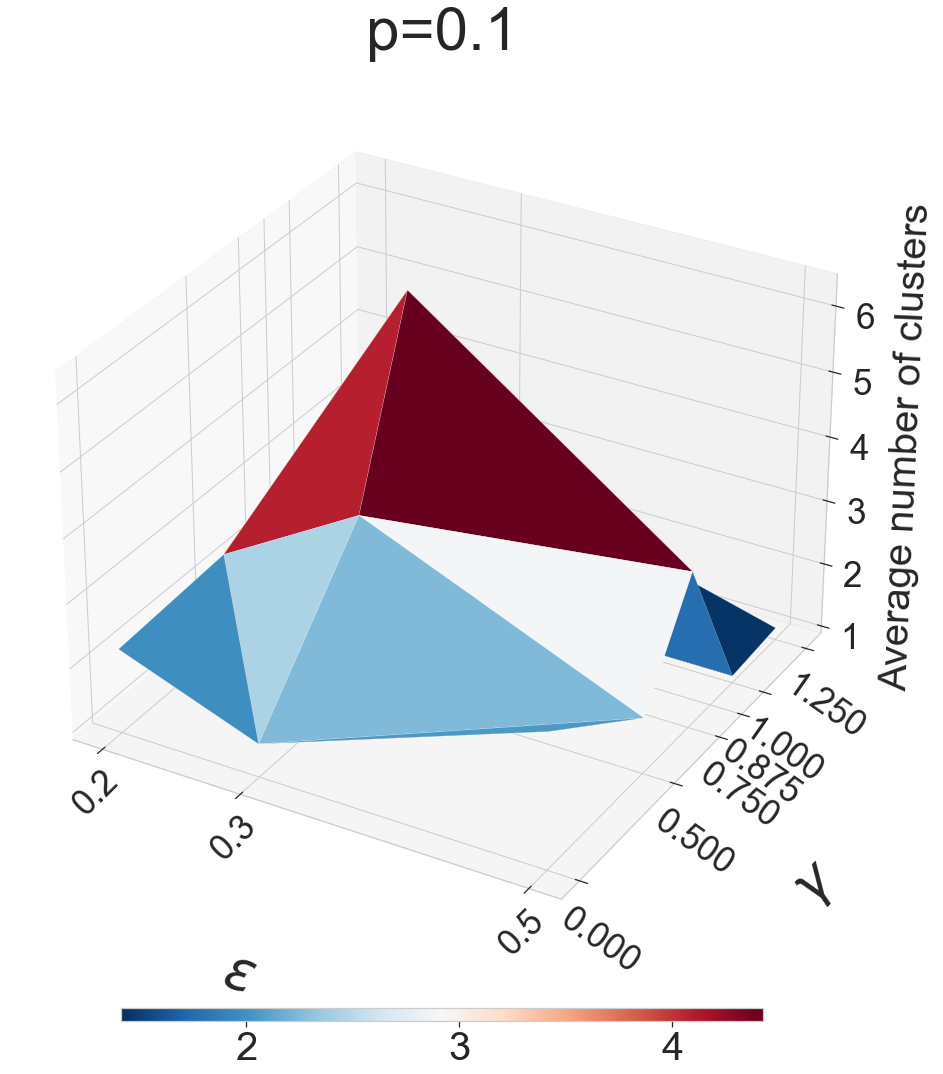

0.3


<Figure size 1800x720 with 0 Axes>

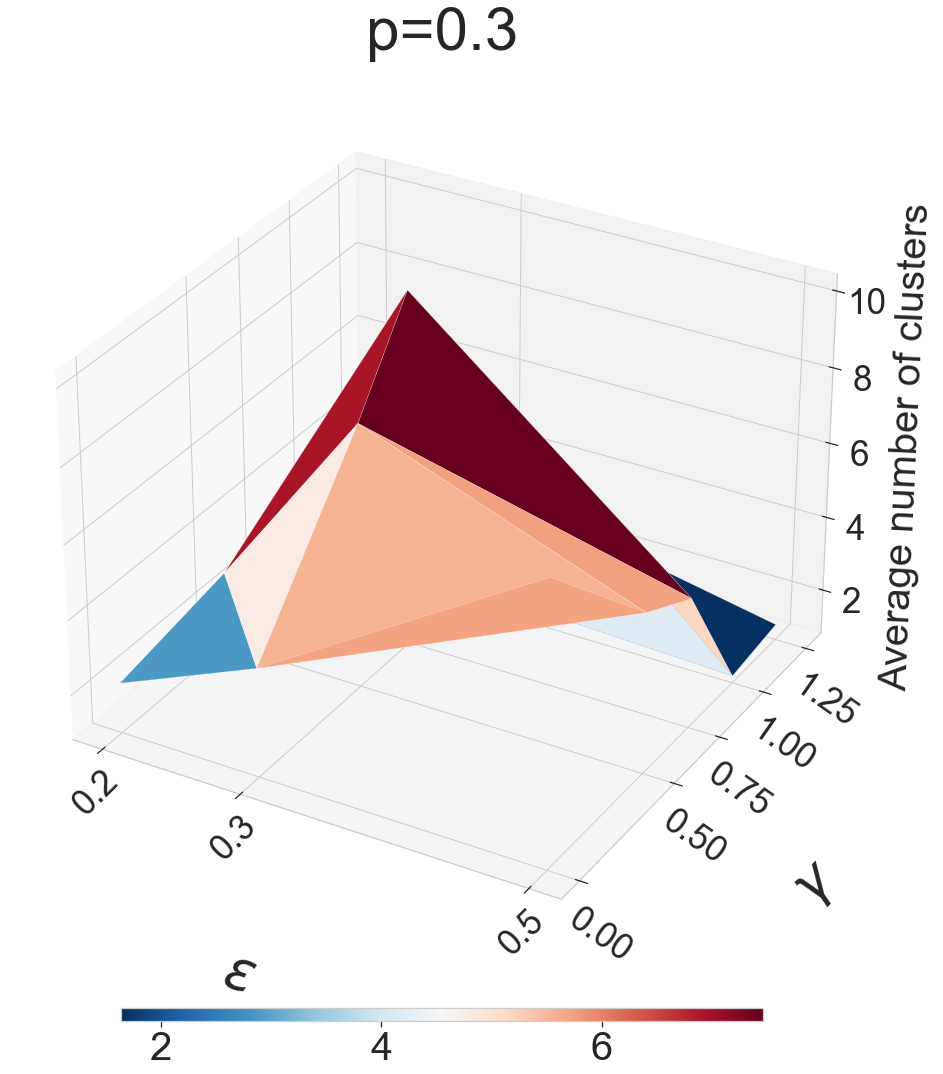

0.5


<Figure size 1800x720 with 0 Axes>

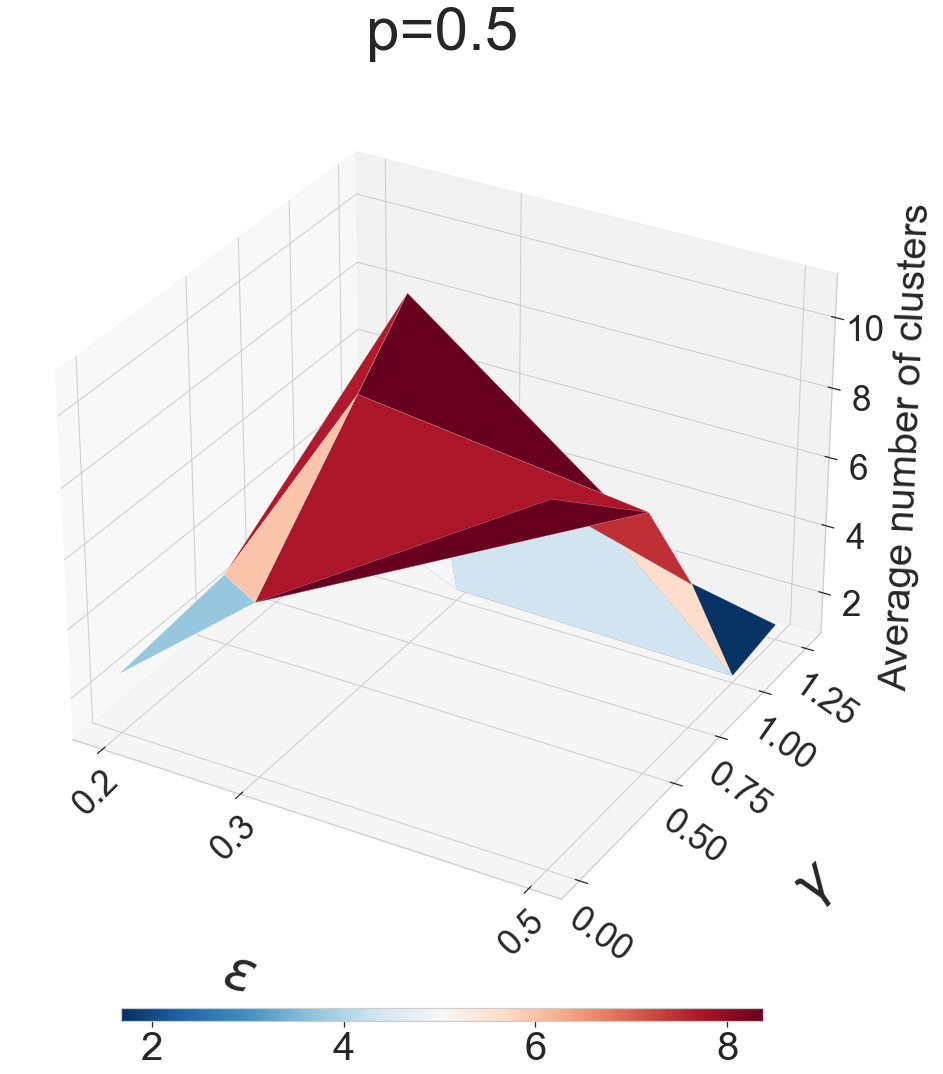

0.1


<Figure size 1800x720 with 0 Axes>

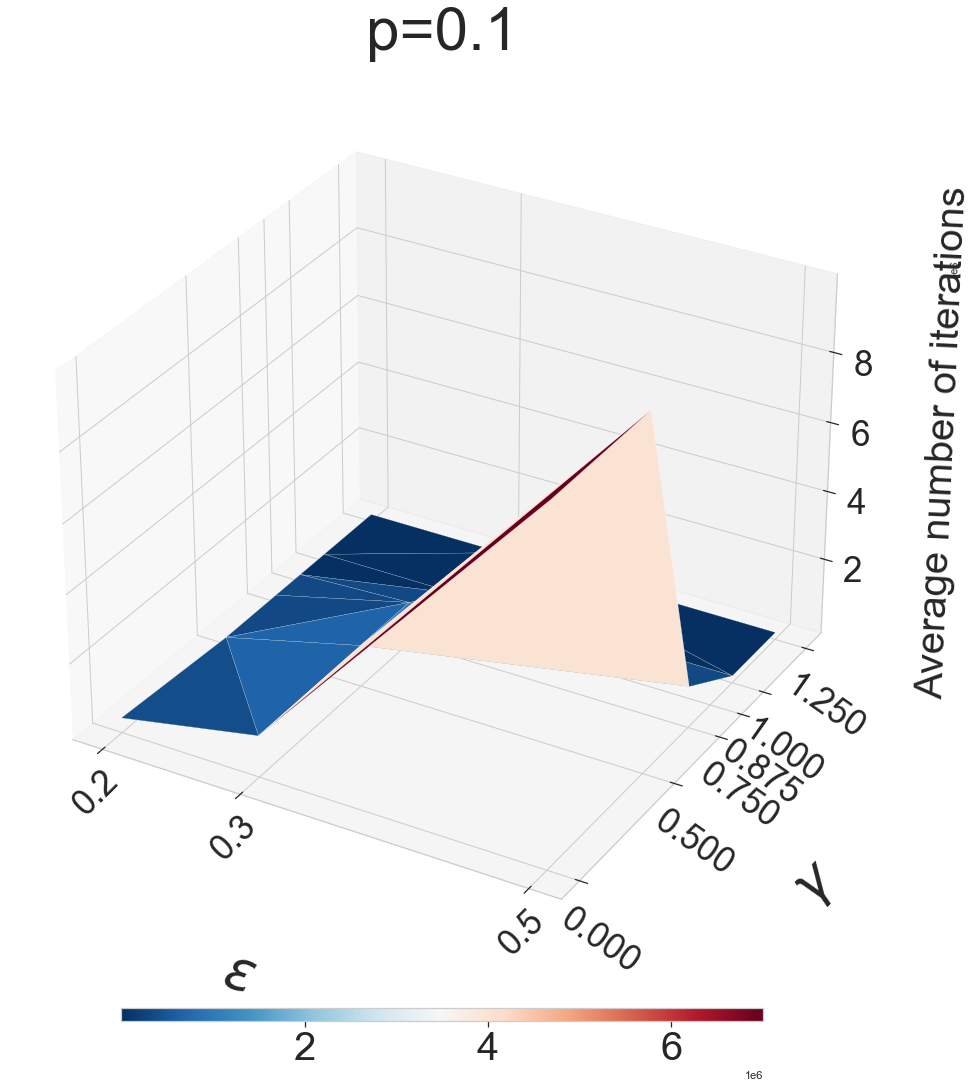

0.3


<Figure size 1800x720 with 0 Axes>

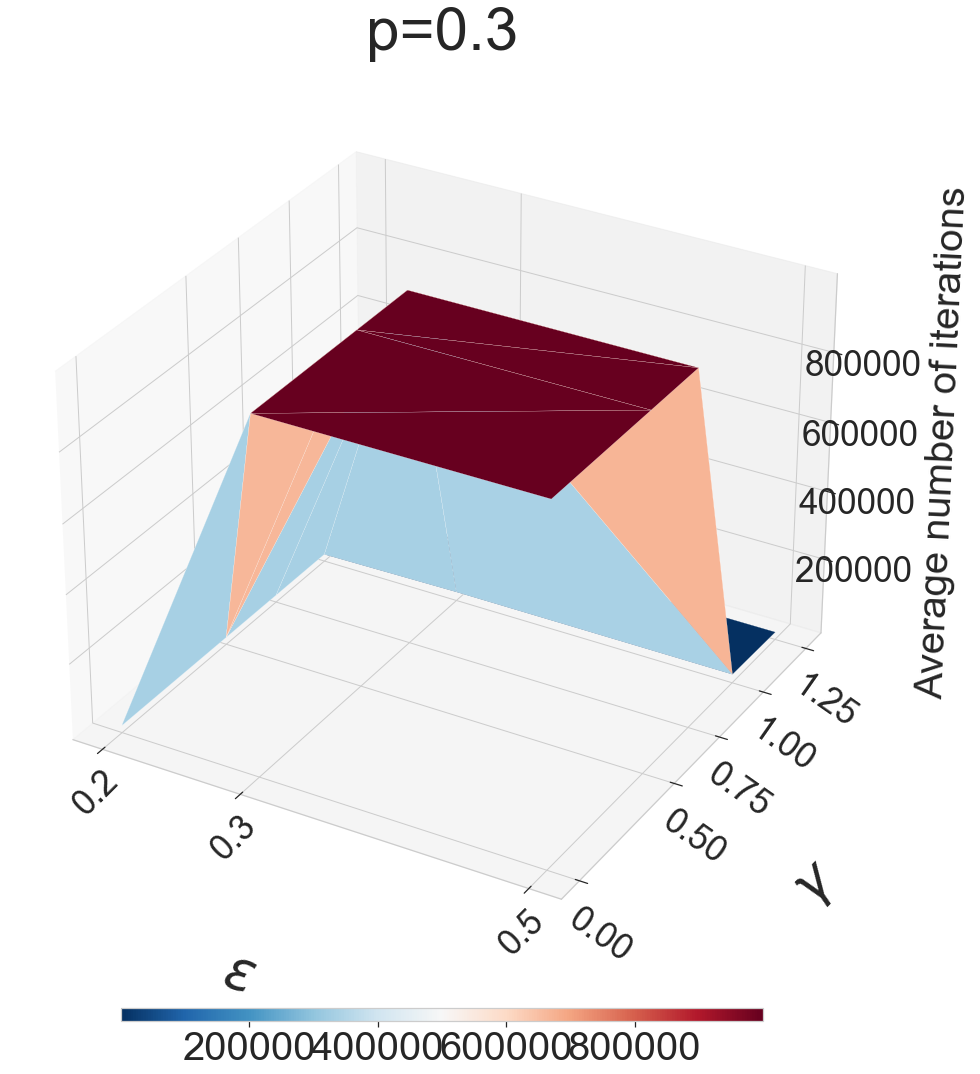

0.5


<Figure size 1800x720 with 0 Axes>

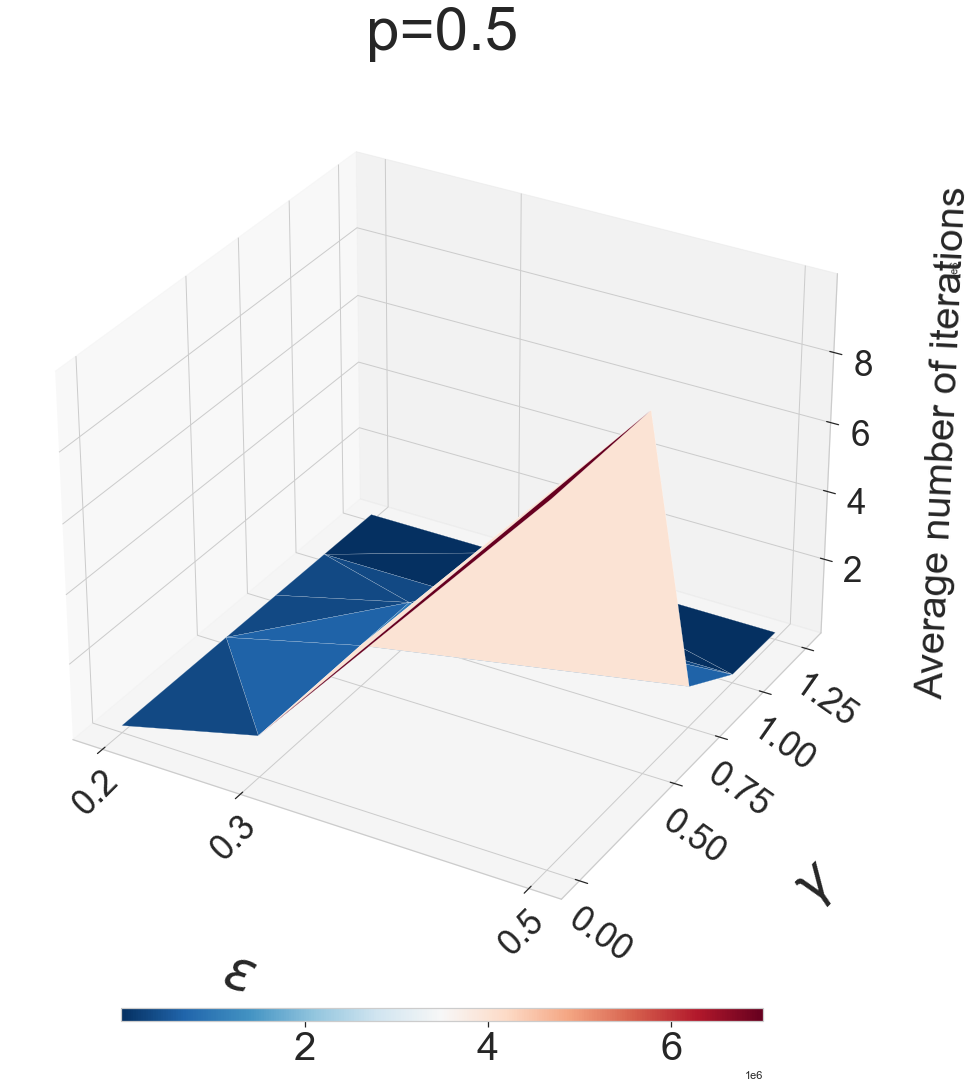

0.1


<Figure size 1800x720 with 0 Axes>

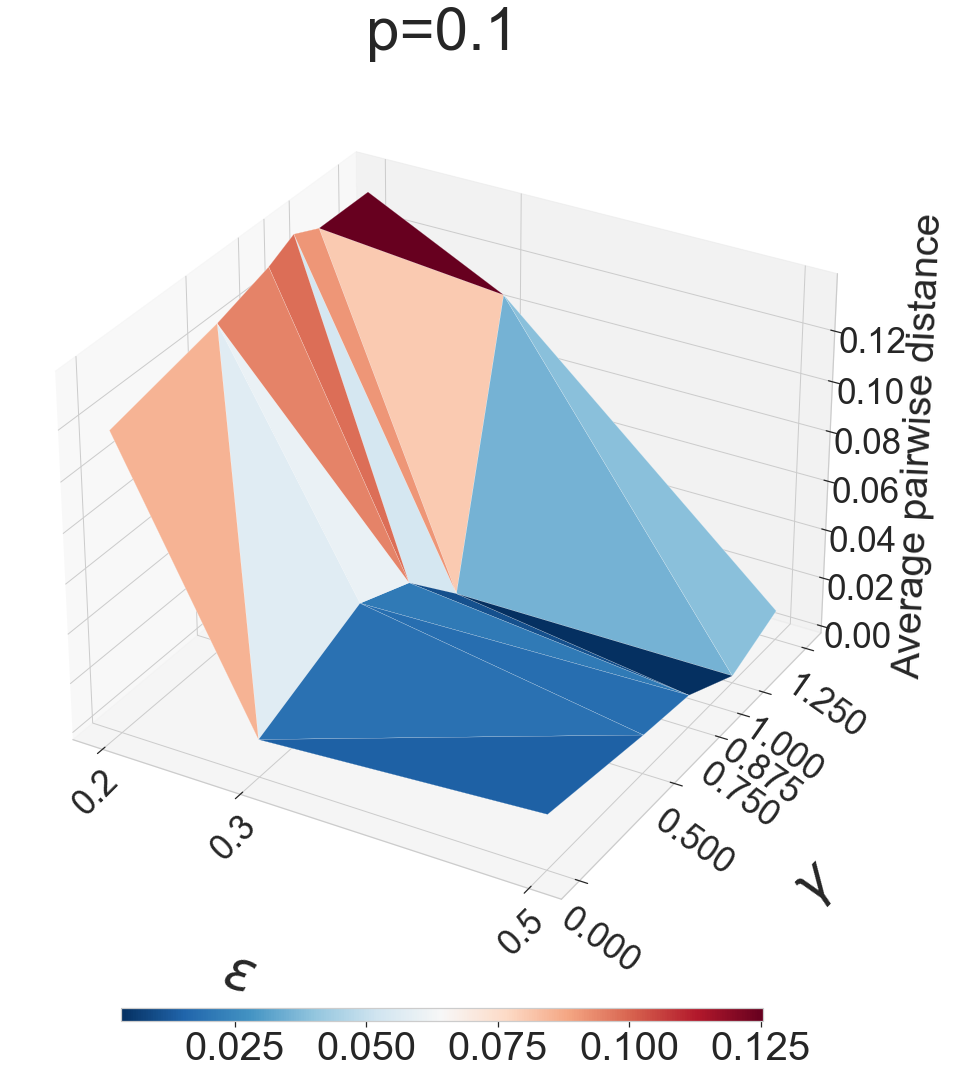

0.3


<Figure size 1800x720 with 0 Axes>

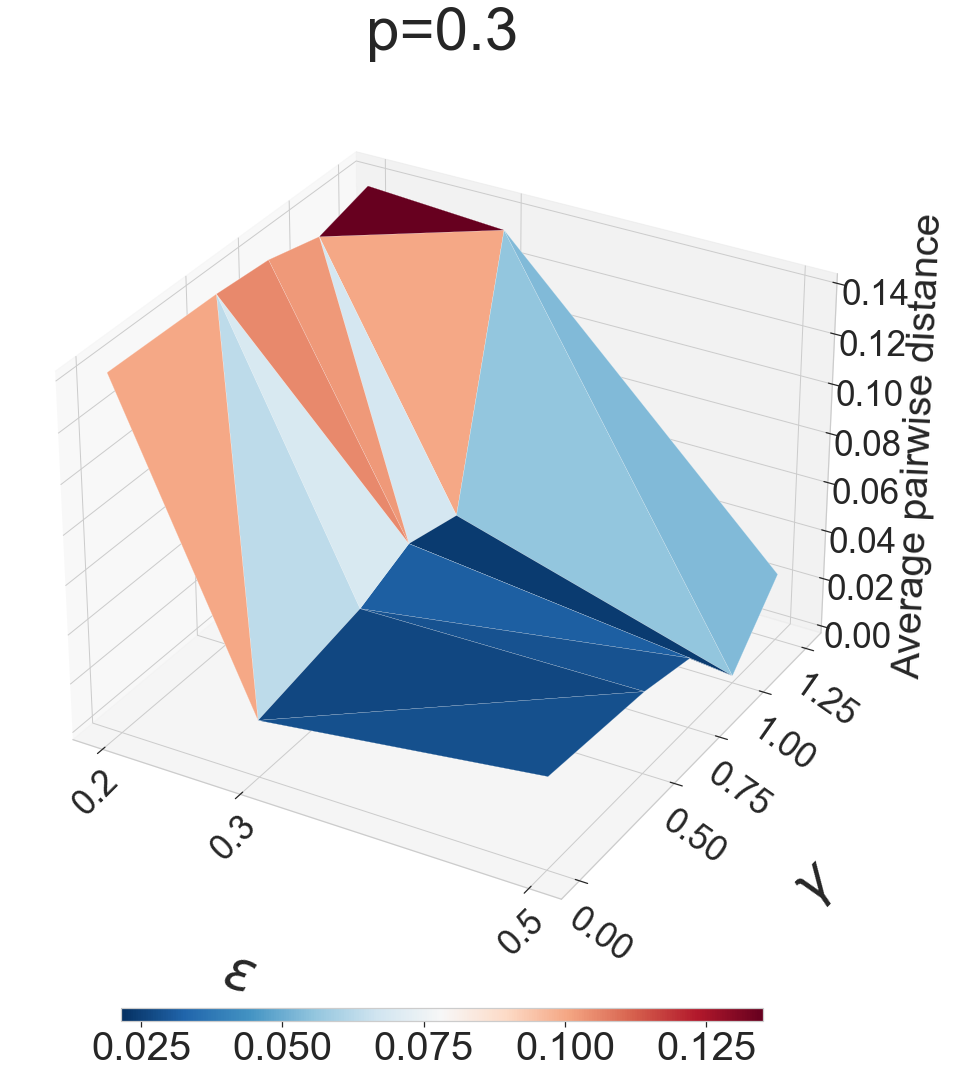

0.5


<Figure size 1800x720 with 0 Axes>

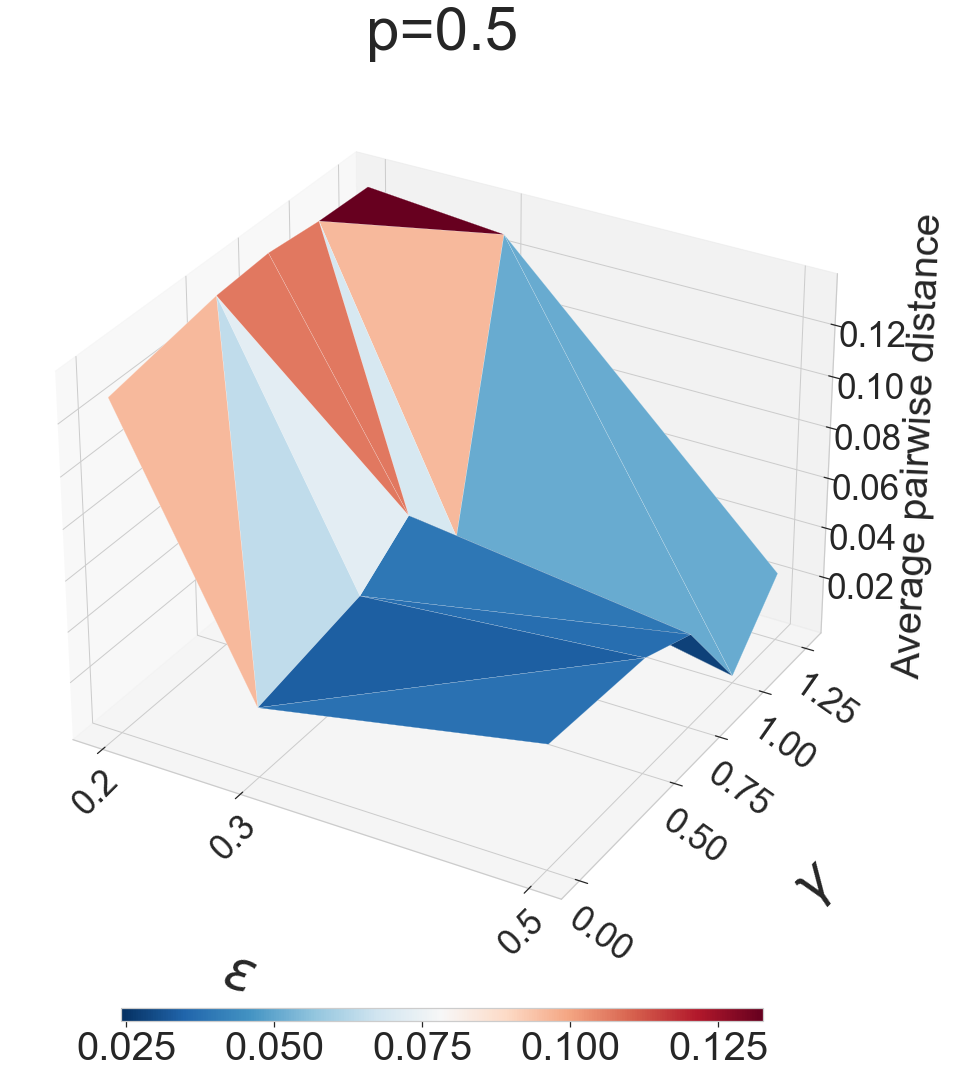

<Figure size 1800x720 with 0 Axes>

In [143]:
for graph in graphs:
    for measure in measures:
        for max_gamma in [1.25]:
            for max_eps in [0.5]:
                for p in [0.1, 0.3, 0.5]:
                    if measure == 'avg_pwdist':
                        z_label = 'Average pairwise distance'
                    elif measure == 'avg_niter':
                        z_label = 'Average number of iterations'
                    elif measure == 'avg_ncluster':
                        z_label = 'Average number of clusters'

                    trisurfplot(graph, measure, max_eps=max_eps, max_gam=max_gamma, x='eps', y='gam', p=p, x_label=r'$\epsilon$', y_label=r'$\gamma$', z_label=z_label)
                

### 2D plots

In [144]:
markersymbols=["o","v","^","<",">","1","2","3","4","8","s","P","*","h"]

In [145]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

In [146]:
import math
def plot2d(measure, x_label, group_label, fixed_label):    
    figsize =(25, 10)
    sns.set(rc={'figure.figsize':figsize})
    with sns.axes_style("whitegrid"):
        data = results
        values = list(data[fixed_label].unique())
        print(values)
        for value in values:
            print('fixed_label = {}, value = {}'.format(fixed_label, value))
            fig, ax = plt.subplots()
            dataa = data[data[fixed_label]==value]
            i=0
            std_measure=''
            if measure == 'avg_ncluster':
                ylabel = 'Average number of clusters'
                std_measure ='std_ncluster'
            elif measure == 'avg_pwdist':
                ylabel = 'Average pairwise distance'
                std_measure ='std_pwdist'
            elif measure == 'avg_niter':
                ylabel = 'Average number iterations'
                std_measure ='std_niter'
            for key, d in dataa.groupby(group_label):
                print(key)
                dataaa=dataa[dataa[group_label]==key]
                d.plot(x=x_label, y=measure, ax=ax, label=key, color=colors[i], marker=markersymbols[i], markersize=25)
                ax.errorbar(x=dataaa[x_label], y=dataaa[measure], color=colors[i], yerr=dataaa[std_measure], marker=markersymbols[i], markersize=25)
                i+=1
                

                
            if measure == 'avg_ncluster':
                ax.grid(which='both')
                ax.grid(which='minor', alpha=0.5)
                ax.grid(which='major', alpha=1.0)

                major_ticks_y = np.arange(math.floor(min(dataa[measure].unique())), math.ceil(max(dataa[measure].unique()))+1, 1)
                minor_ticks_y = np.arange(math.floor(min(dataa[measure].unique())), math.ceil(max(dataa[measure].unique()))+1, 0.5)

                ax.set_yticks(major_ticks_y)
                ax.set_yticks(minor_ticks_y, minor=True)

            ax.set_xticks(list(dataa[x_label].unique()))
            ax.tick_params(axis='both', which='major', labelsize=40, pad=8)

                                      
            if x_label == 'eps':
                fig.gca().set_xlabel(r'$\epsilon$', fontsize=60, labelpad=35)
            elif x_label == 'gam':
                fig.gca().set_xlabel(r'$\gamma$', fontsize=60, labelpad=35)
            elif x_label == 'p':
                fig.gca().set_xlabel('p', fontsize=60, labelpad=35)
                
            if fixed_label == 'eps':
                fig.gca().set_title(r'$\epsilon$ = {}'.format(value), fontsize=60)
            elif fixed_label == 'gam':
                fig.gca().set_title(r'$\gamma$= {}'.format(value), fontsize=60)
            elif fixed_label == 'p':
                fig.gca().set_title('p= {}'.format(value), fontsize=60)    

            ax.set_ylabel(ylabel, fontsize=40, labelpad=35)
            
            legend = plt.legend(prop={'size': 50},bbox_to_anchor=(1.05, 1), loc='upper left') #forse devo ingrandire il font
            plt.savefig('C:/Users/valen/Documents/Github/2019_Pansanella/datasets/out/mediamodel/plots/N100_2D_{}_xlabel_{}_groupby_{}_{}{}_errorbars.png'.format(measure, x_label, group_label, fixed_label, value),
                   papertype = 'a4', bbox_inches='tight')
            plt.show()
            plt.close()

In [147]:
measures = ['avg_ncluster', 'avg_niter', 'avg_pwdist']

[0.1, 0.3, 0.5]
fixed_label = p, value = 0.1
0.2
0.3
0.5


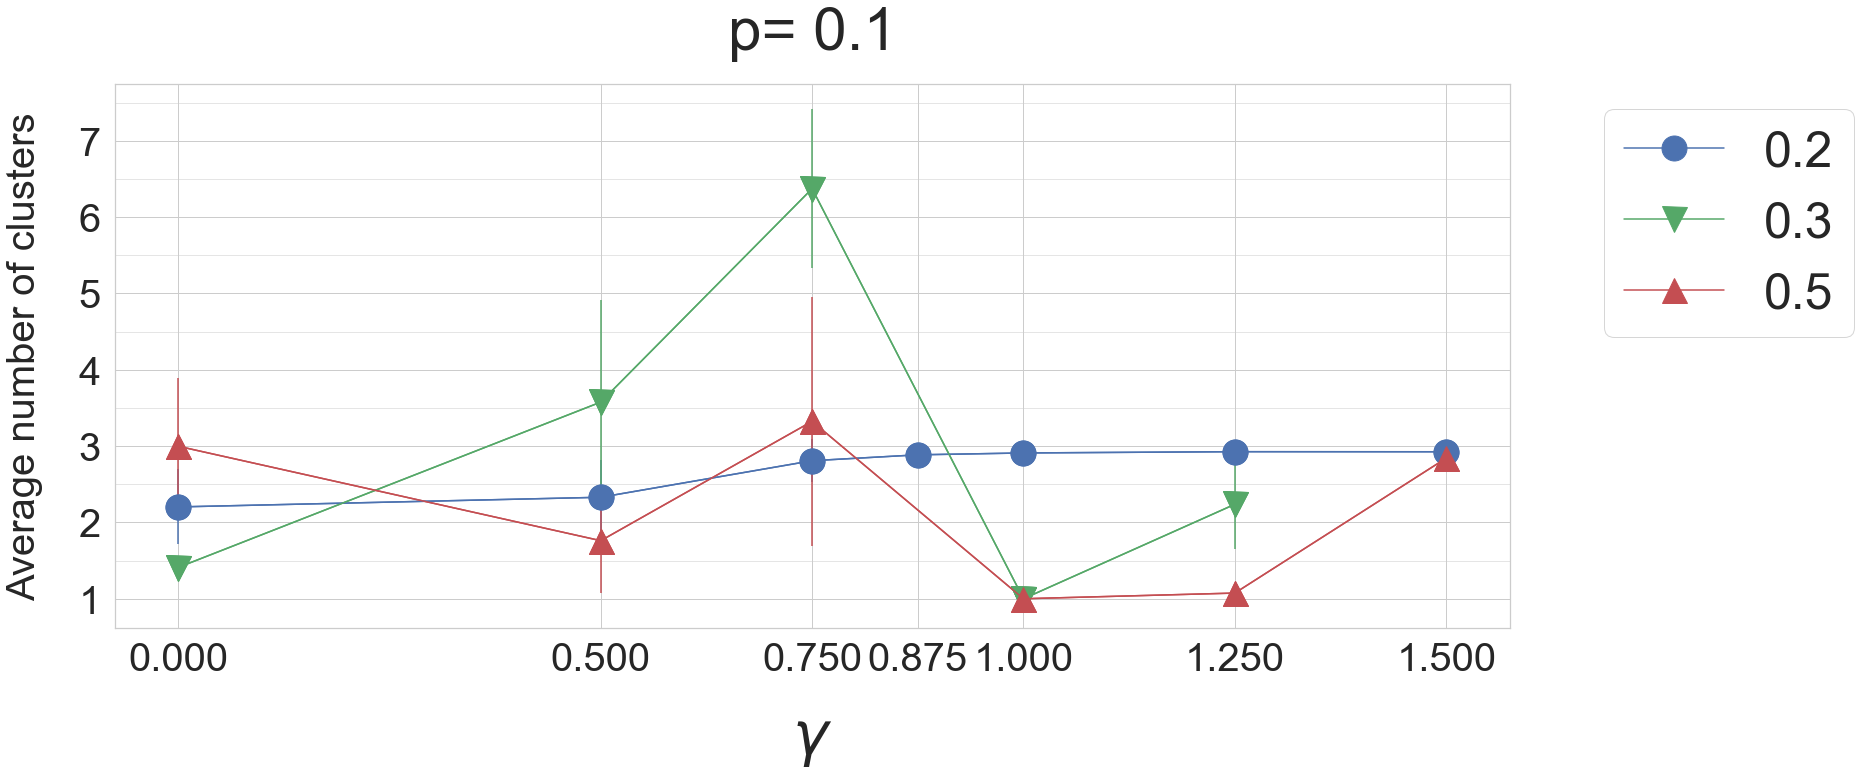

fixed_label = p, value = 0.3
0.2
0.3
0.5


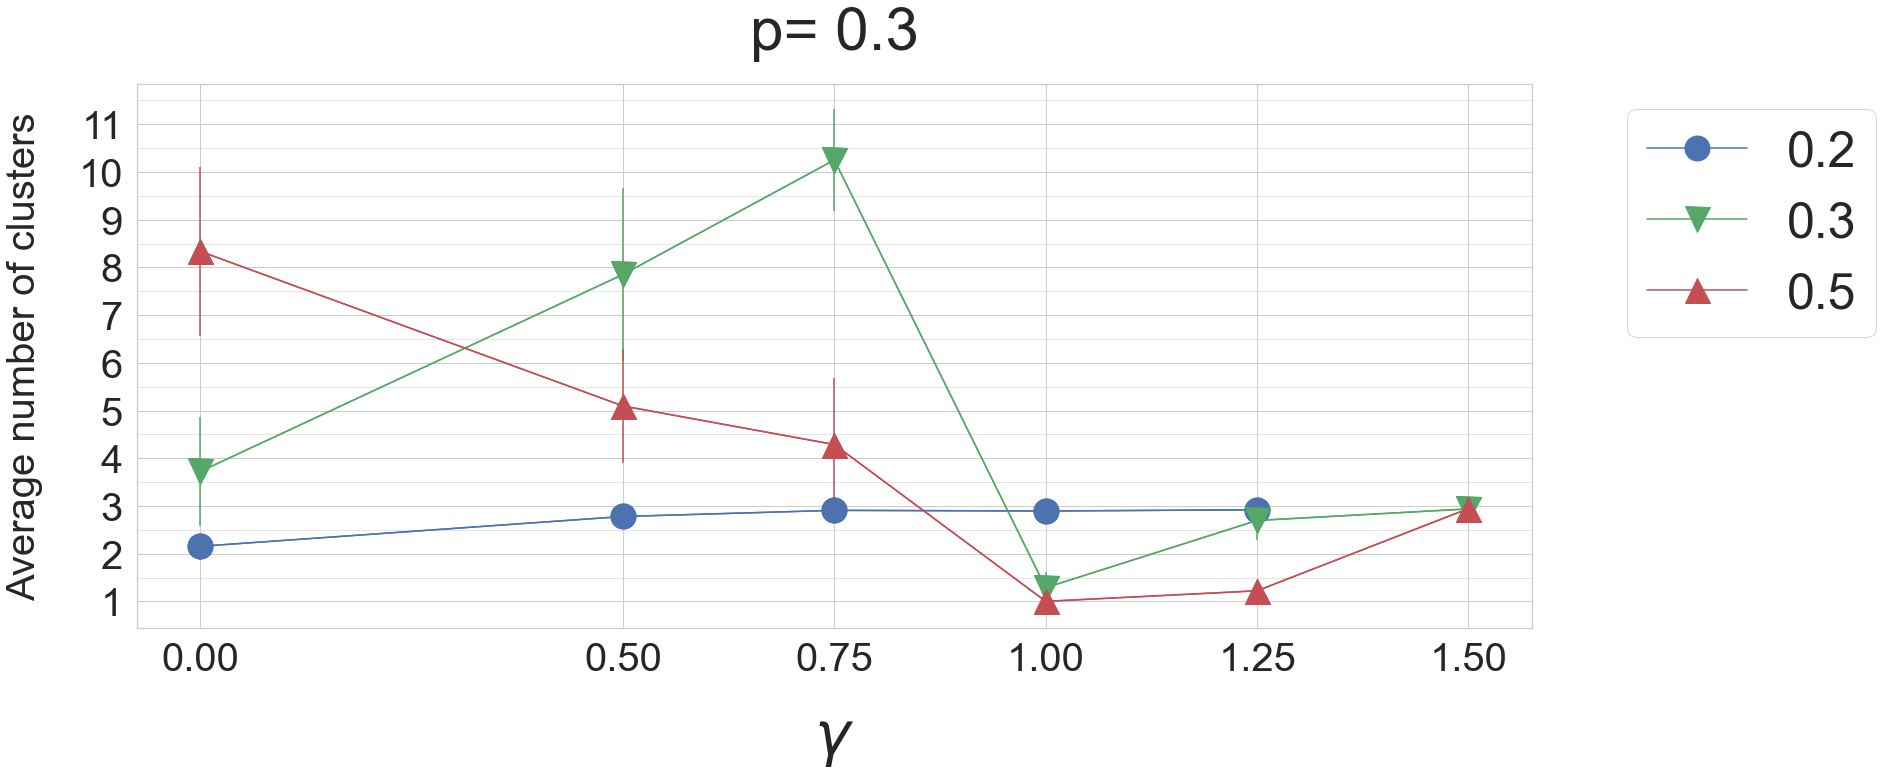

fixed_label = p, value = 0.5
0.2
0.3
0.5


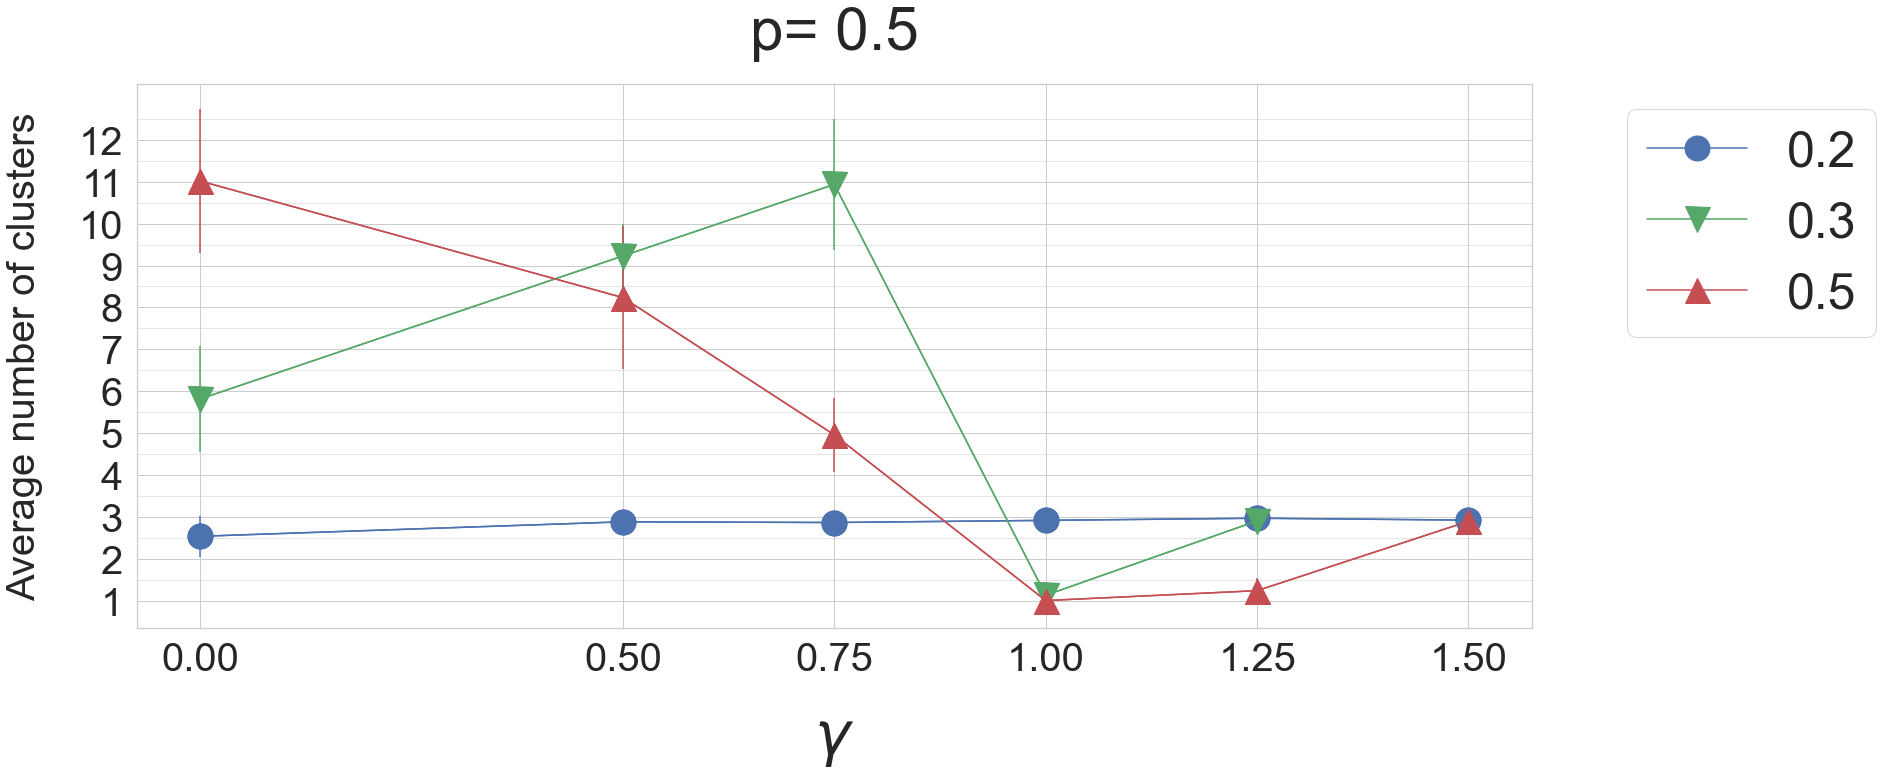

[0.2, 0.3, 0.5]
fixed_label = eps, value = 0.2
0.1
0.3
0.5


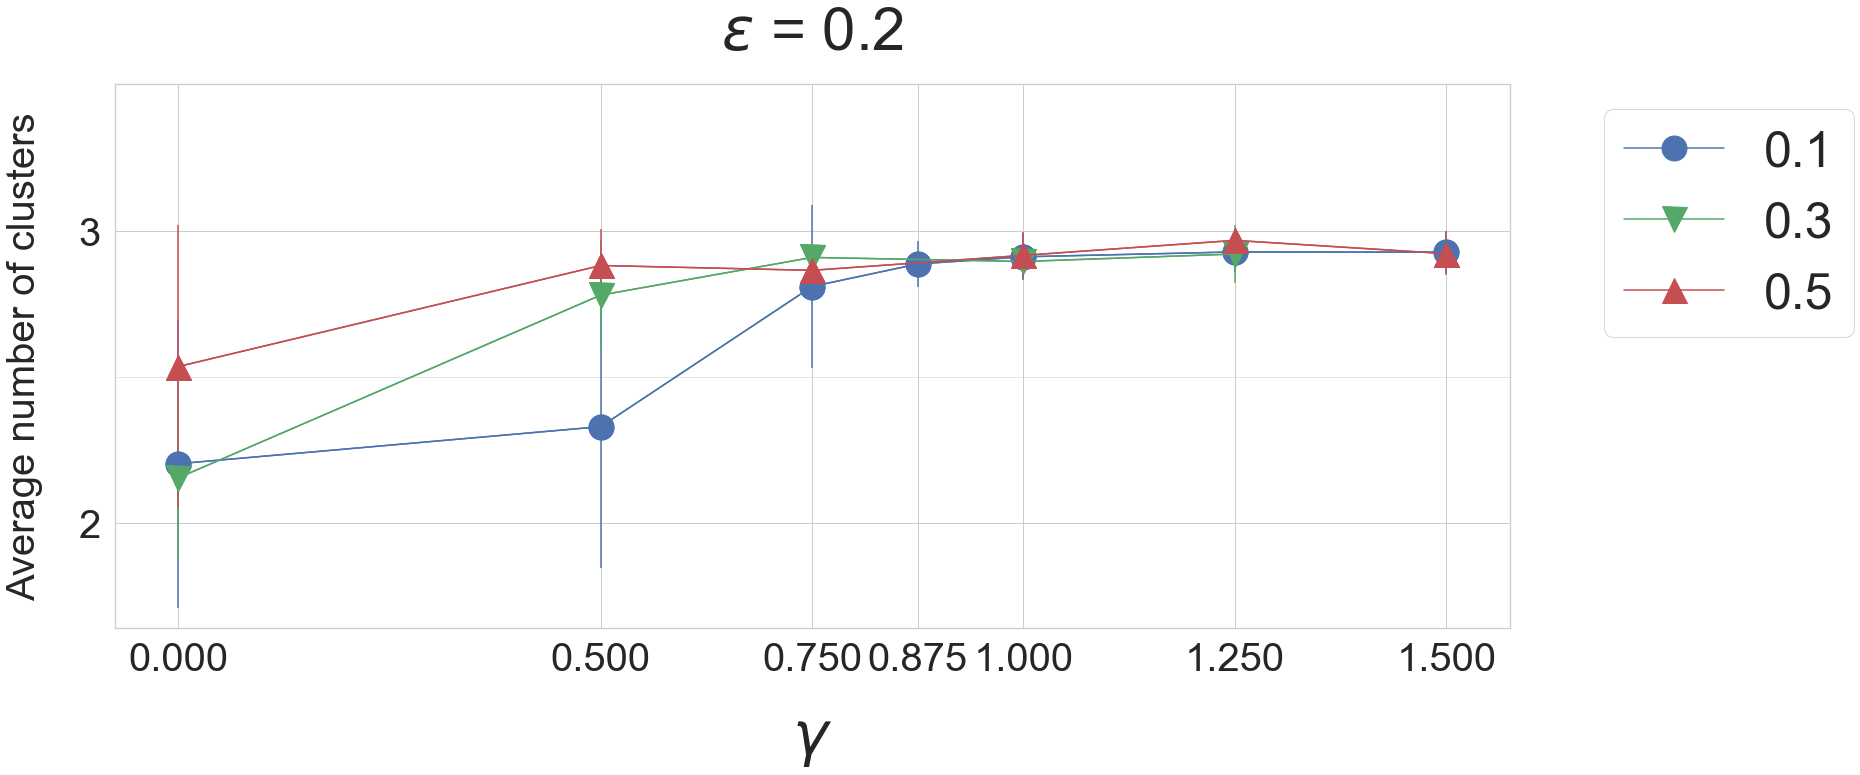

fixed_label = eps, value = 0.3
0.1
0.3
0.5


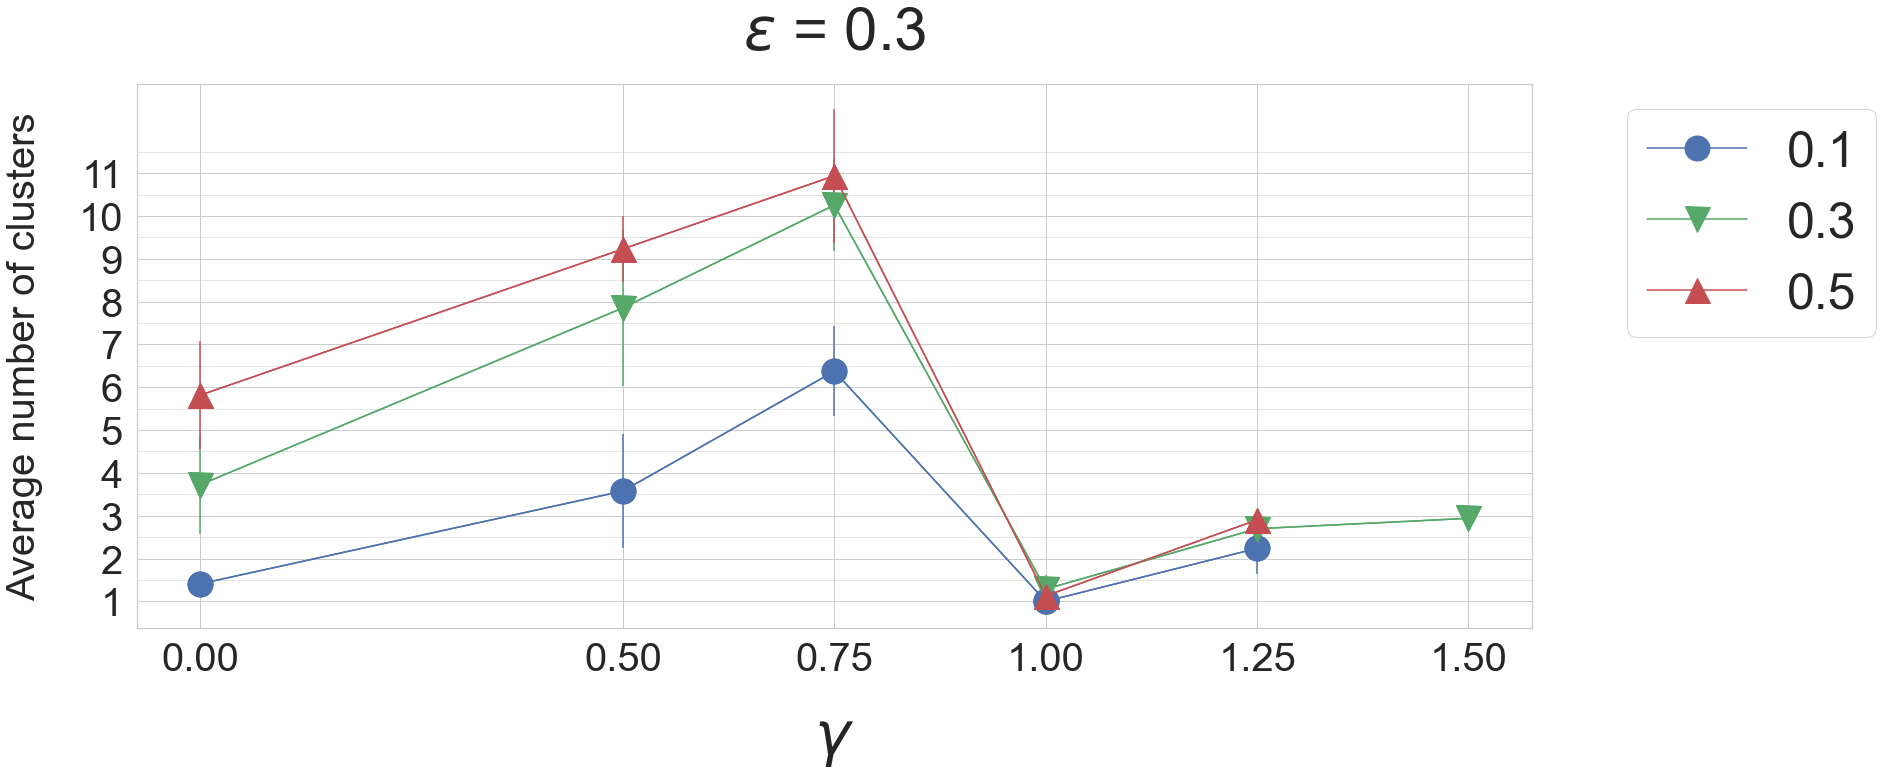

fixed_label = eps, value = 0.5
0.1
0.3
0.5


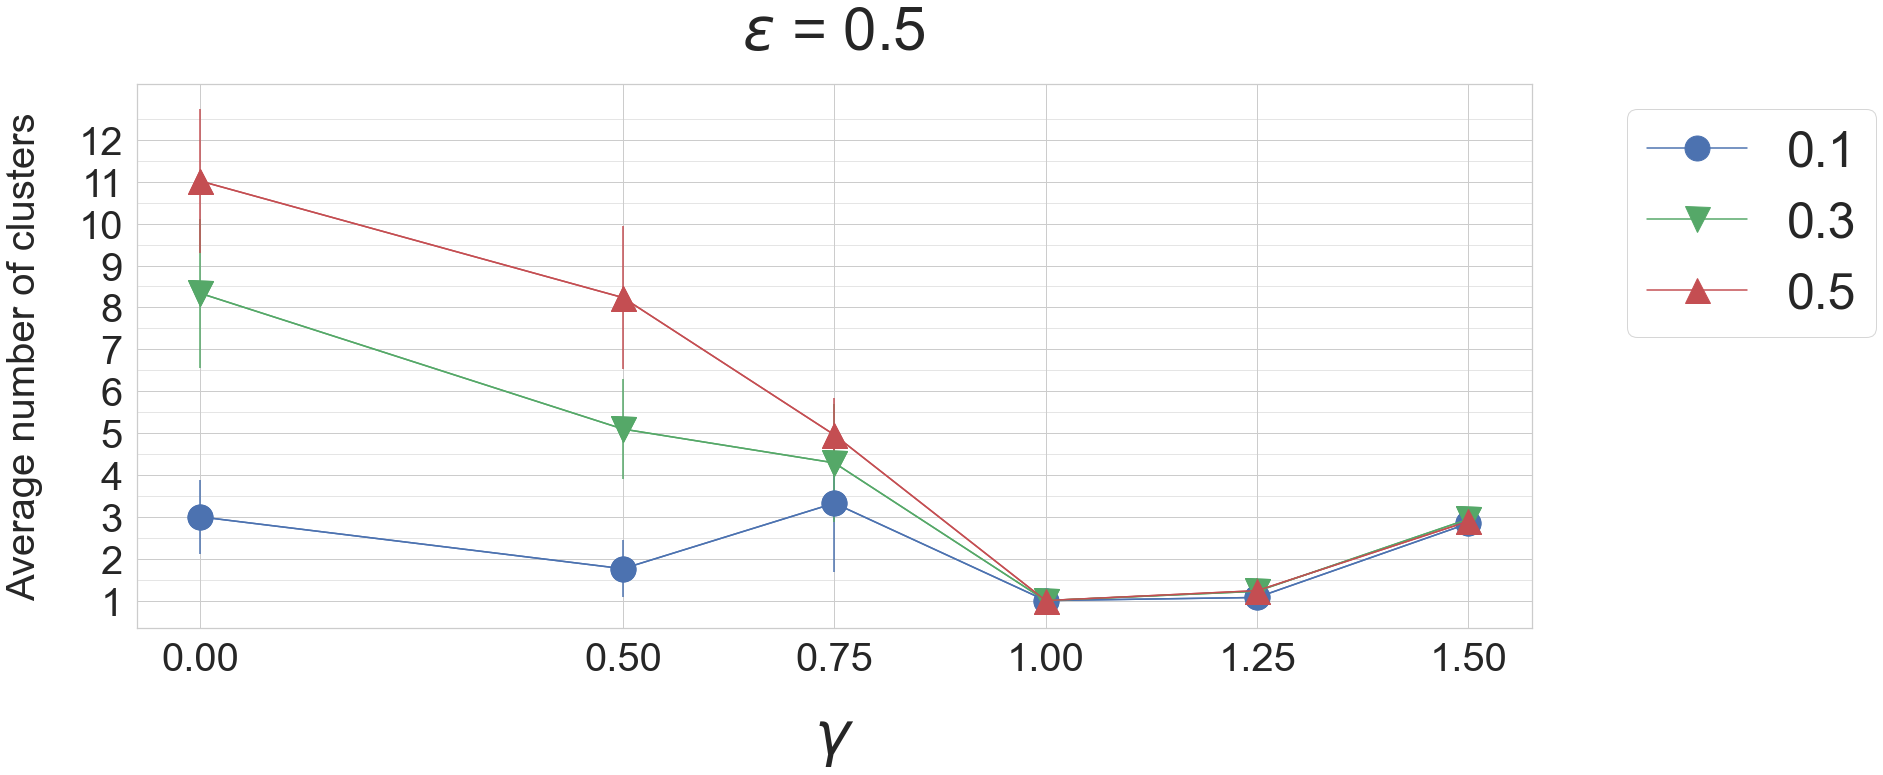

[0.1, 0.3, 0.5]
fixed_label = p, value = 0.1
0.2
0.3
0.5


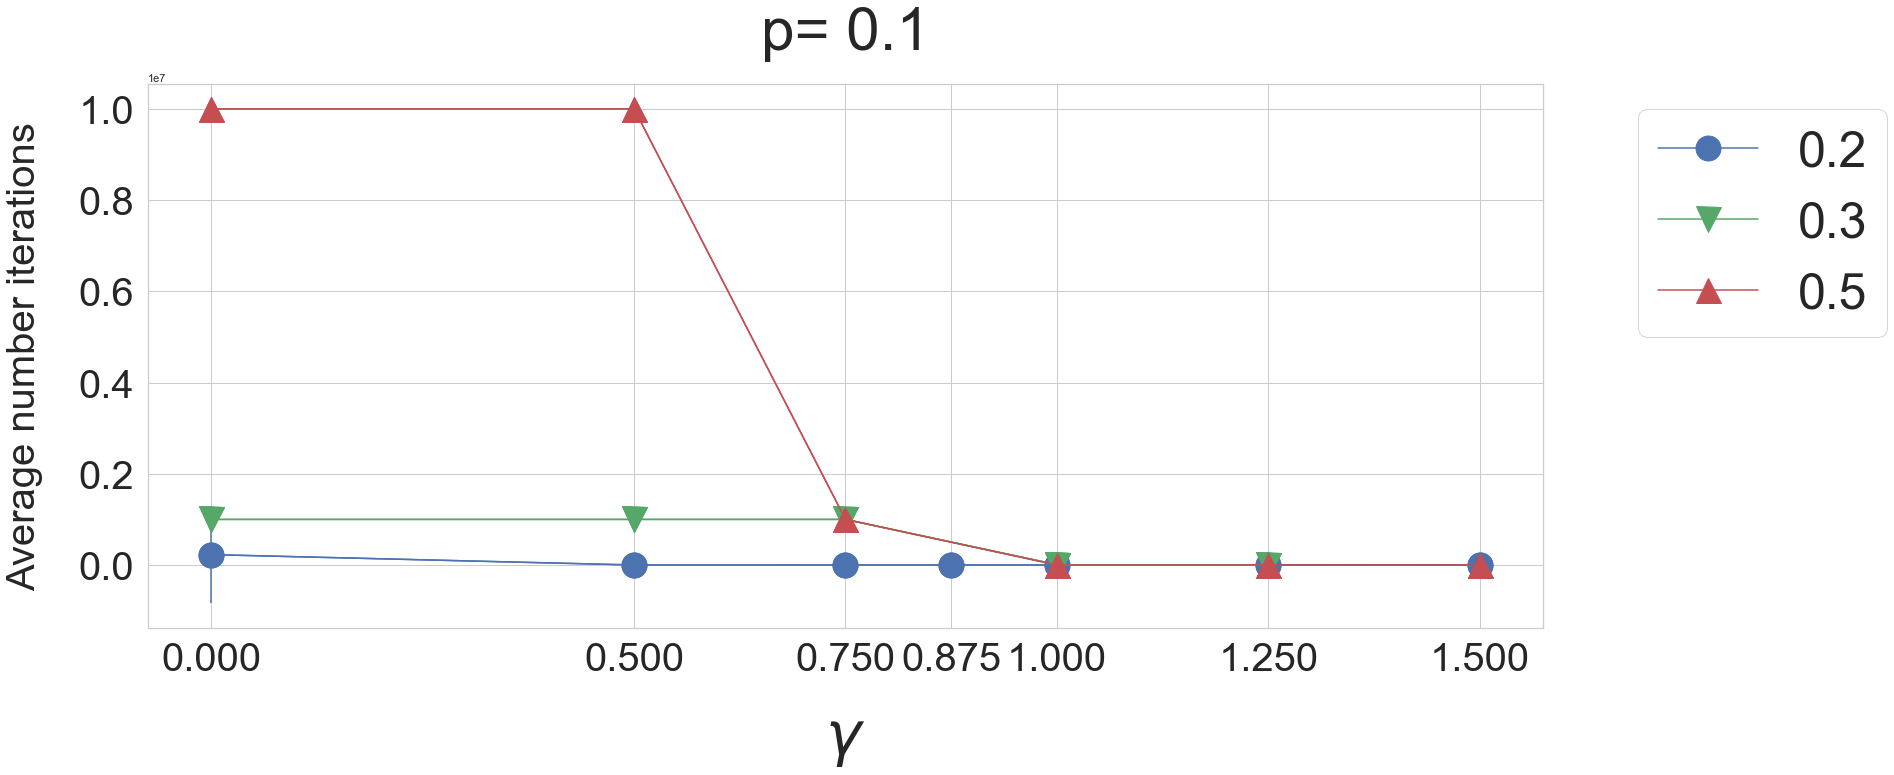

fixed_label = p, value = 0.3
0.2
0.3
0.5


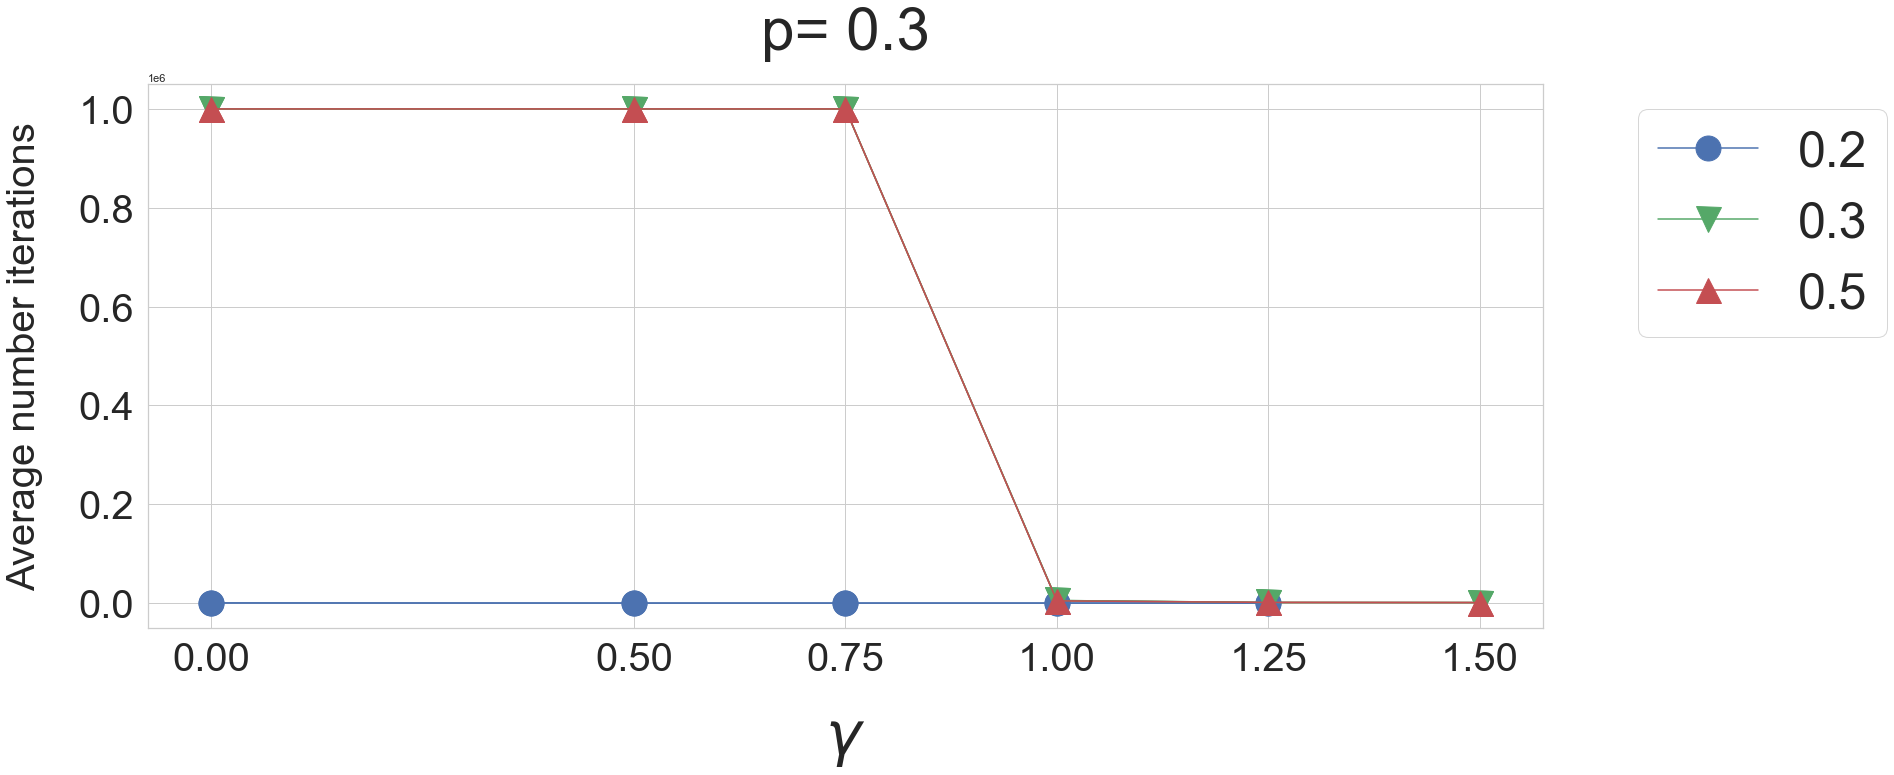

fixed_label = p, value = 0.5
0.2
0.3
0.5


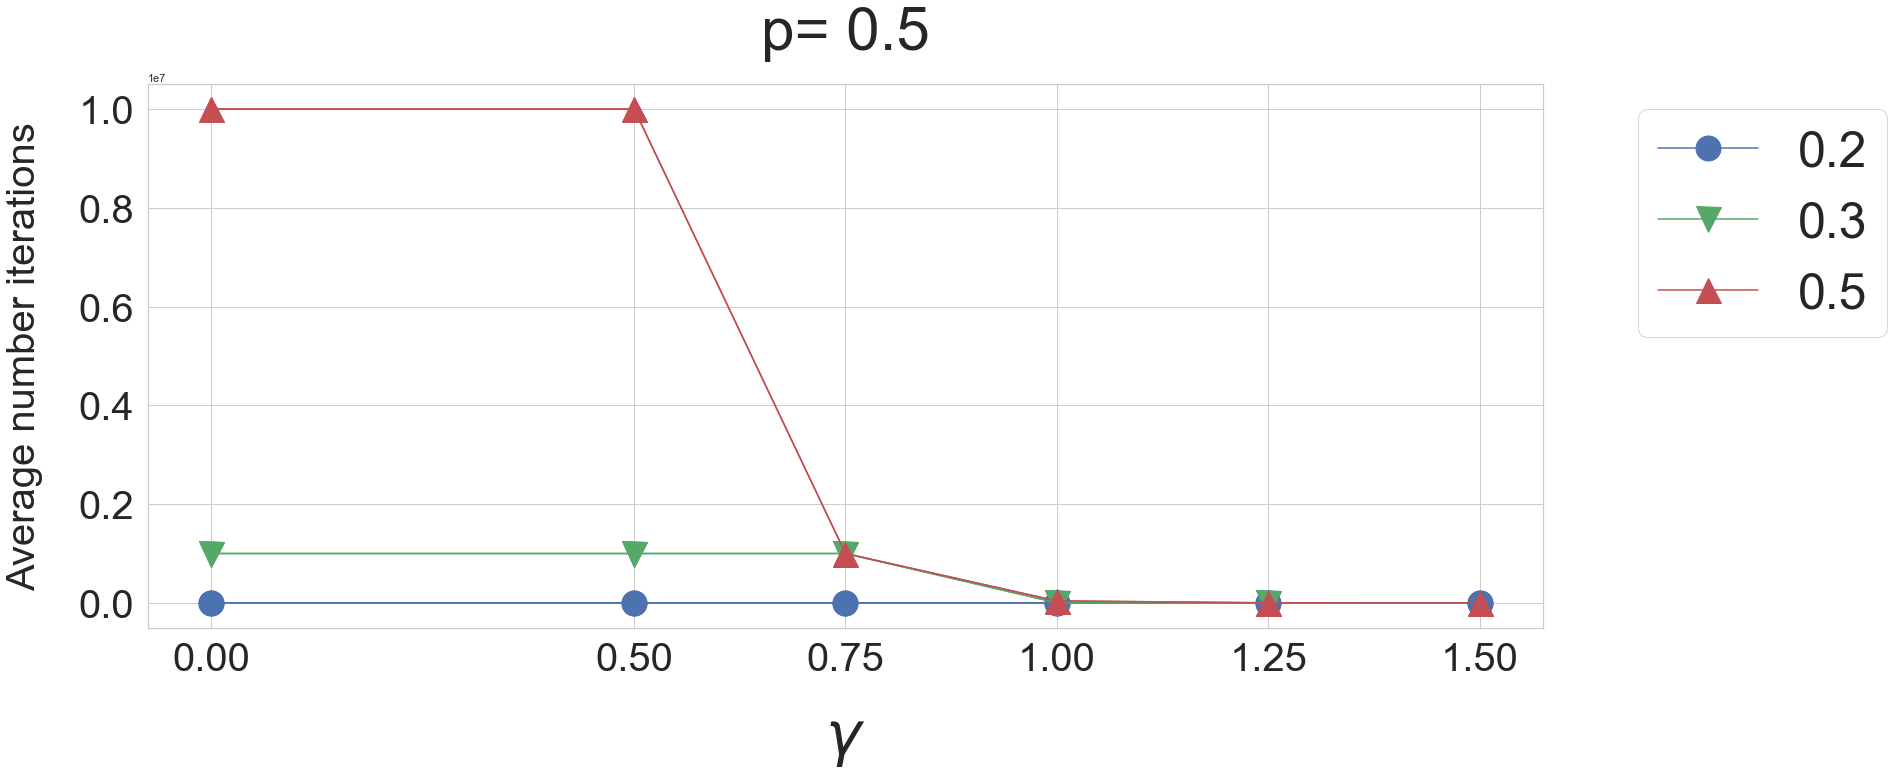

[0.2, 0.3, 0.5]
fixed_label = eps, value = 0.2
0.1
0.3
0.5


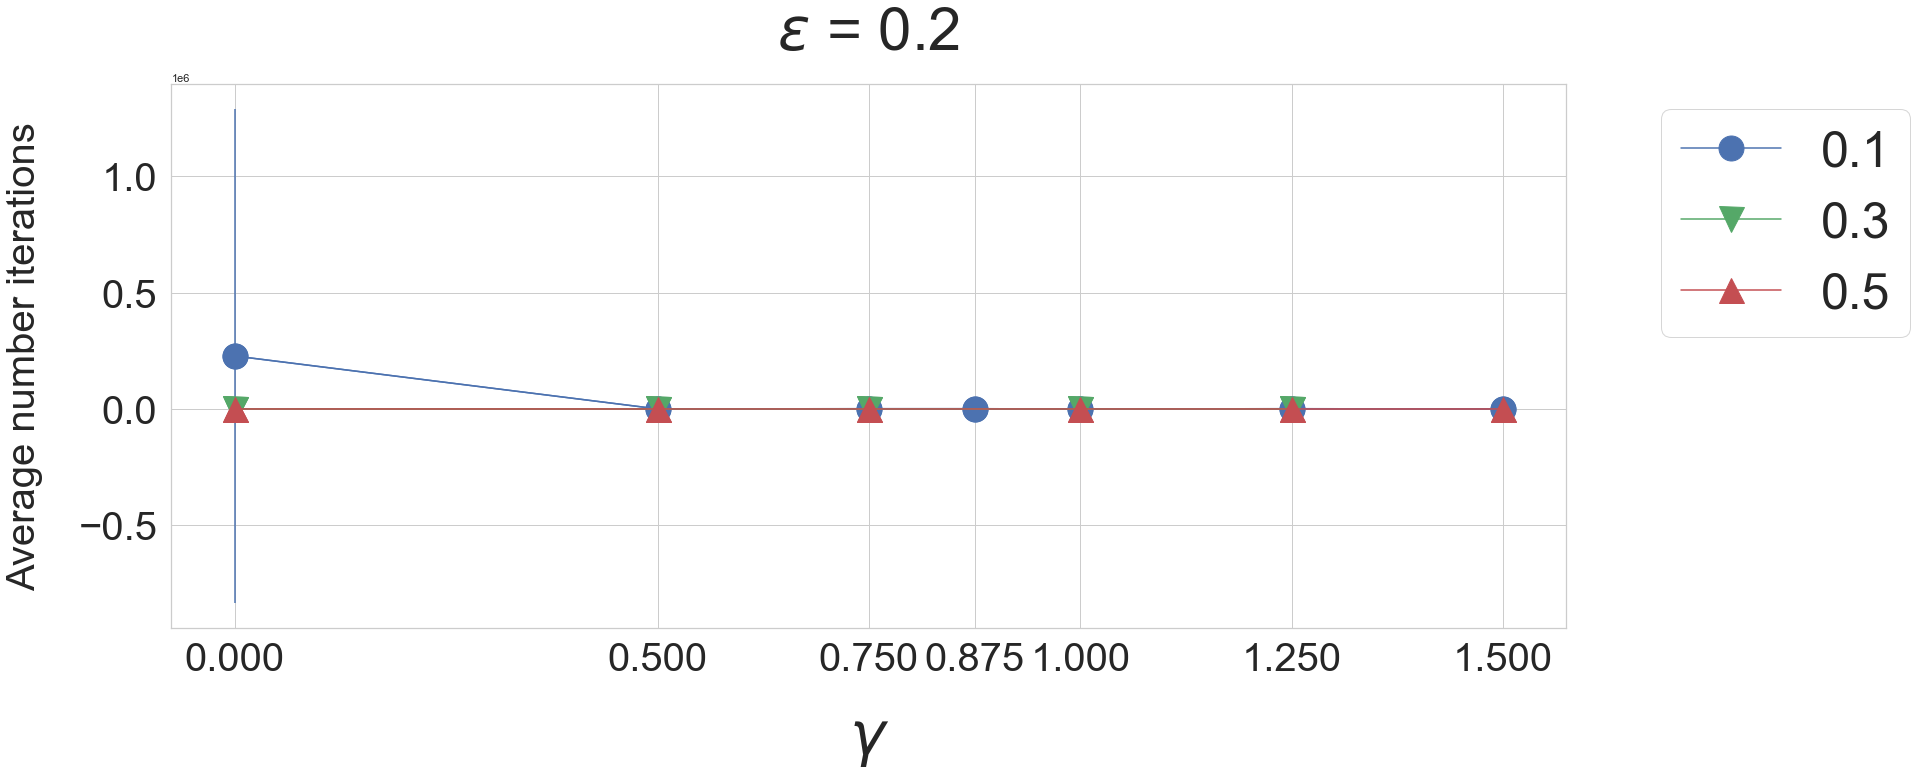

fixed_label = eps, value = 0.3
0.1
0.3
0.5


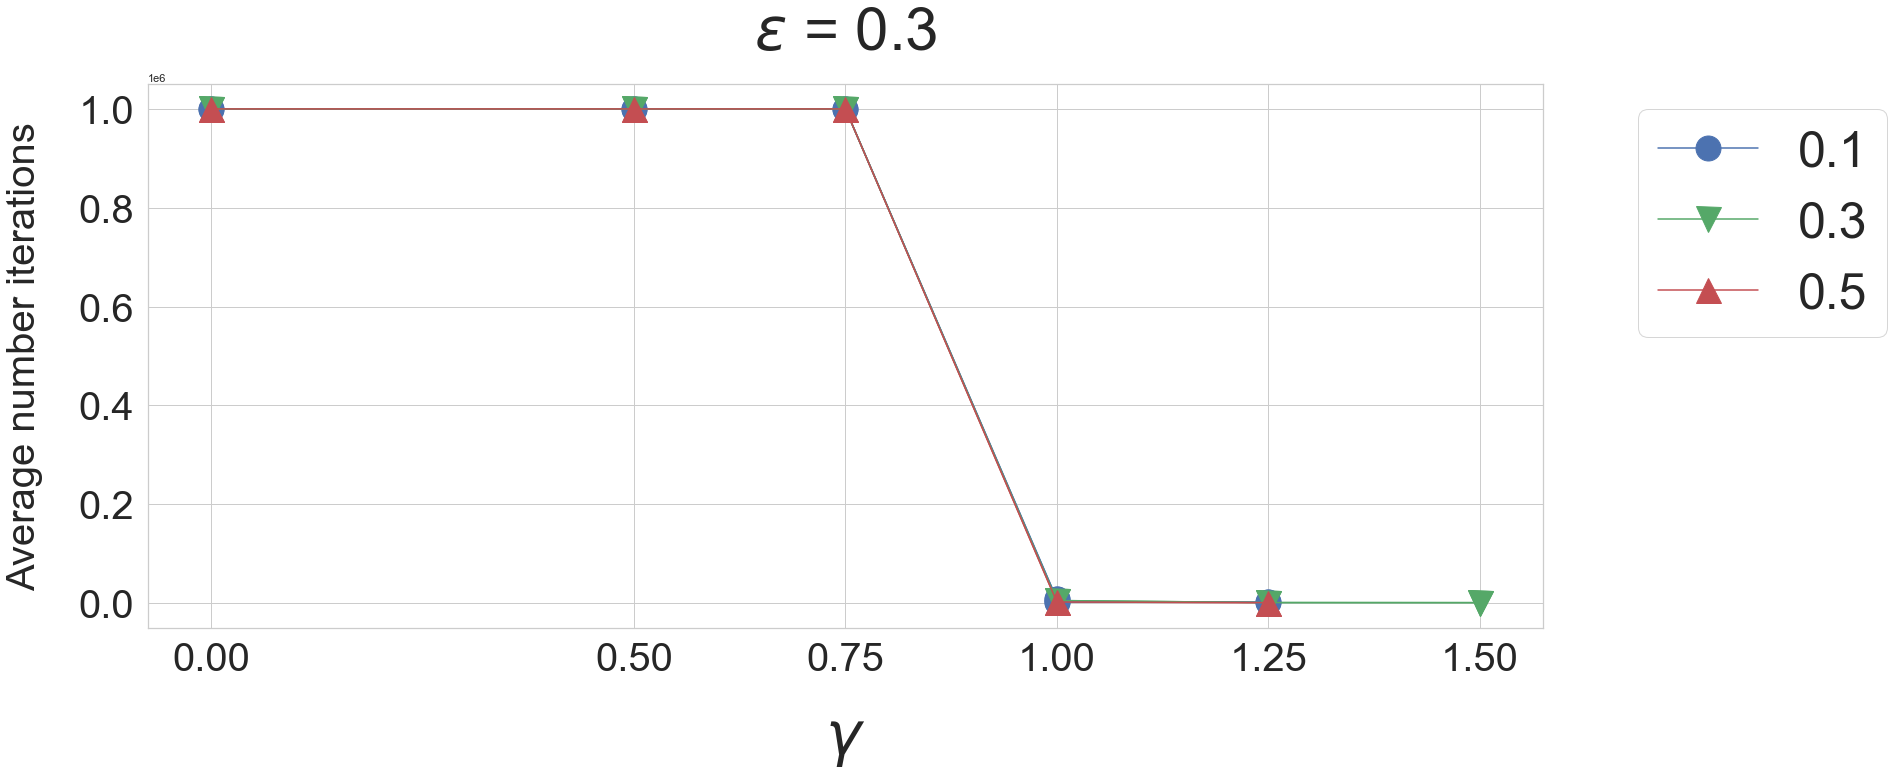

fixed_label = eps, value = 0.5
0.1
0.3
0.5


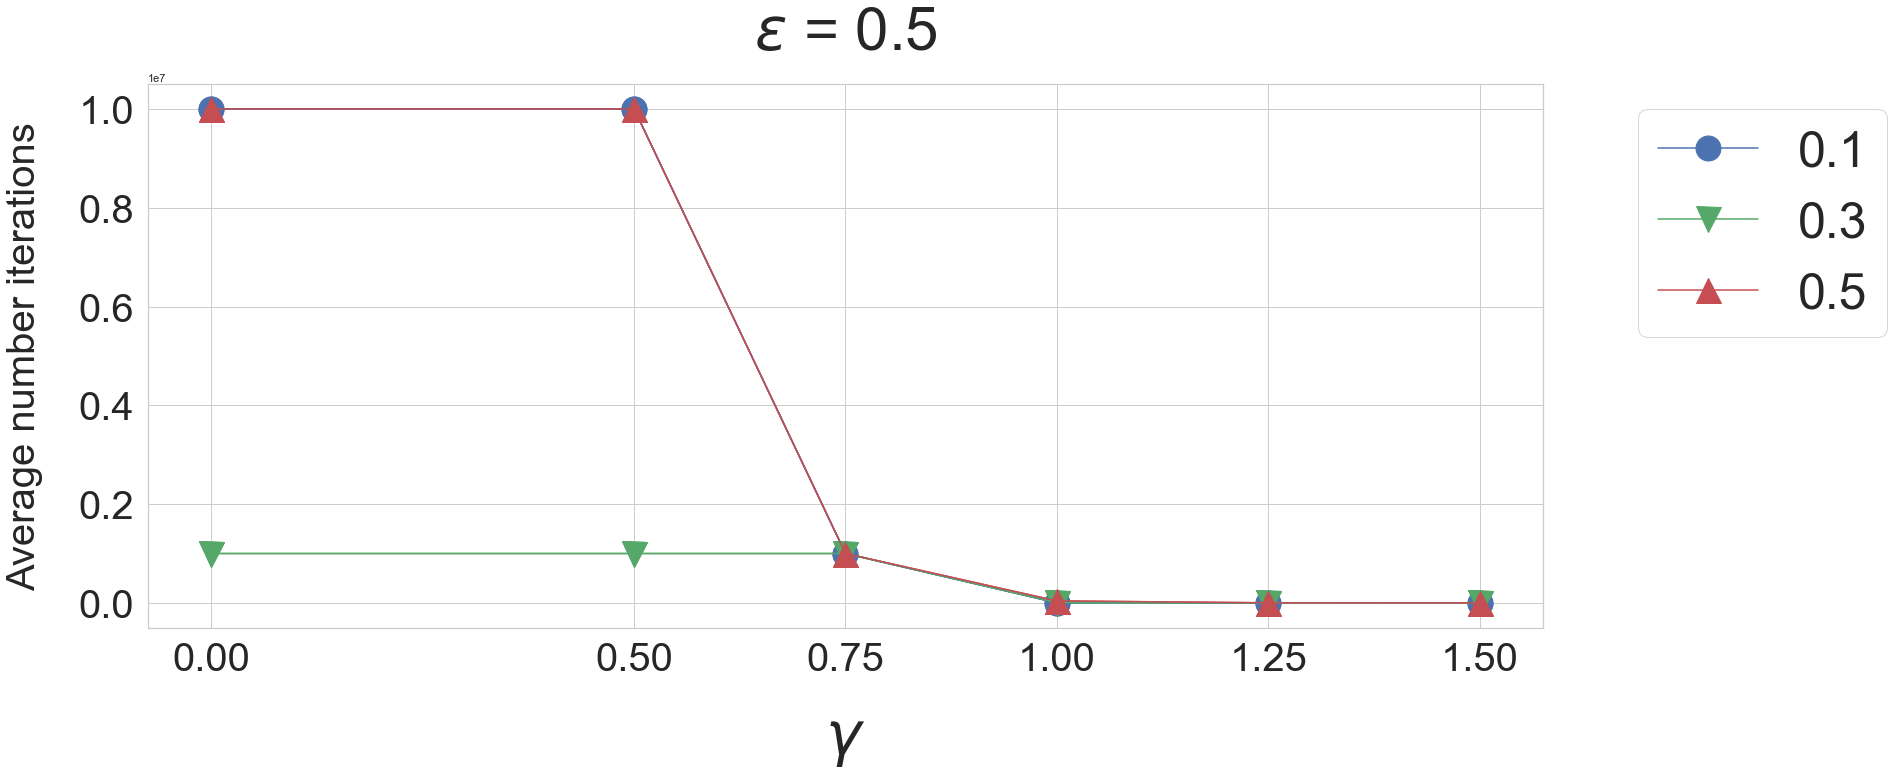

[0.1, 0.3, 0.5]
fixed_label = p, value = 0.1
0.2
0.3
0.5


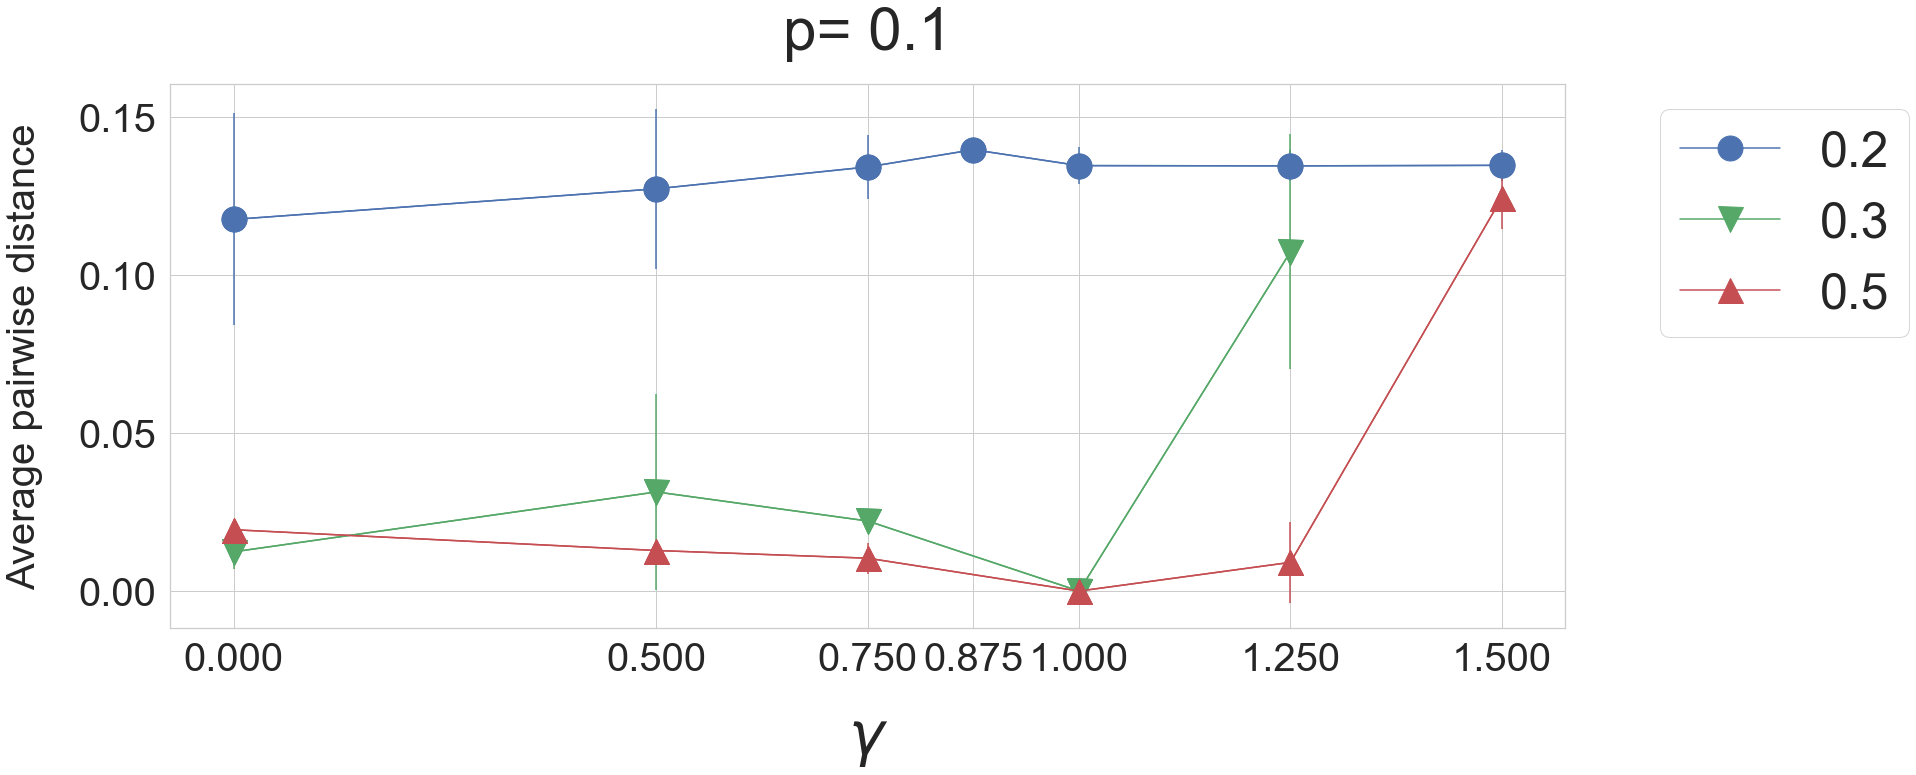

fixed_label = p, value = 0.3
0.2
0.3
0.5


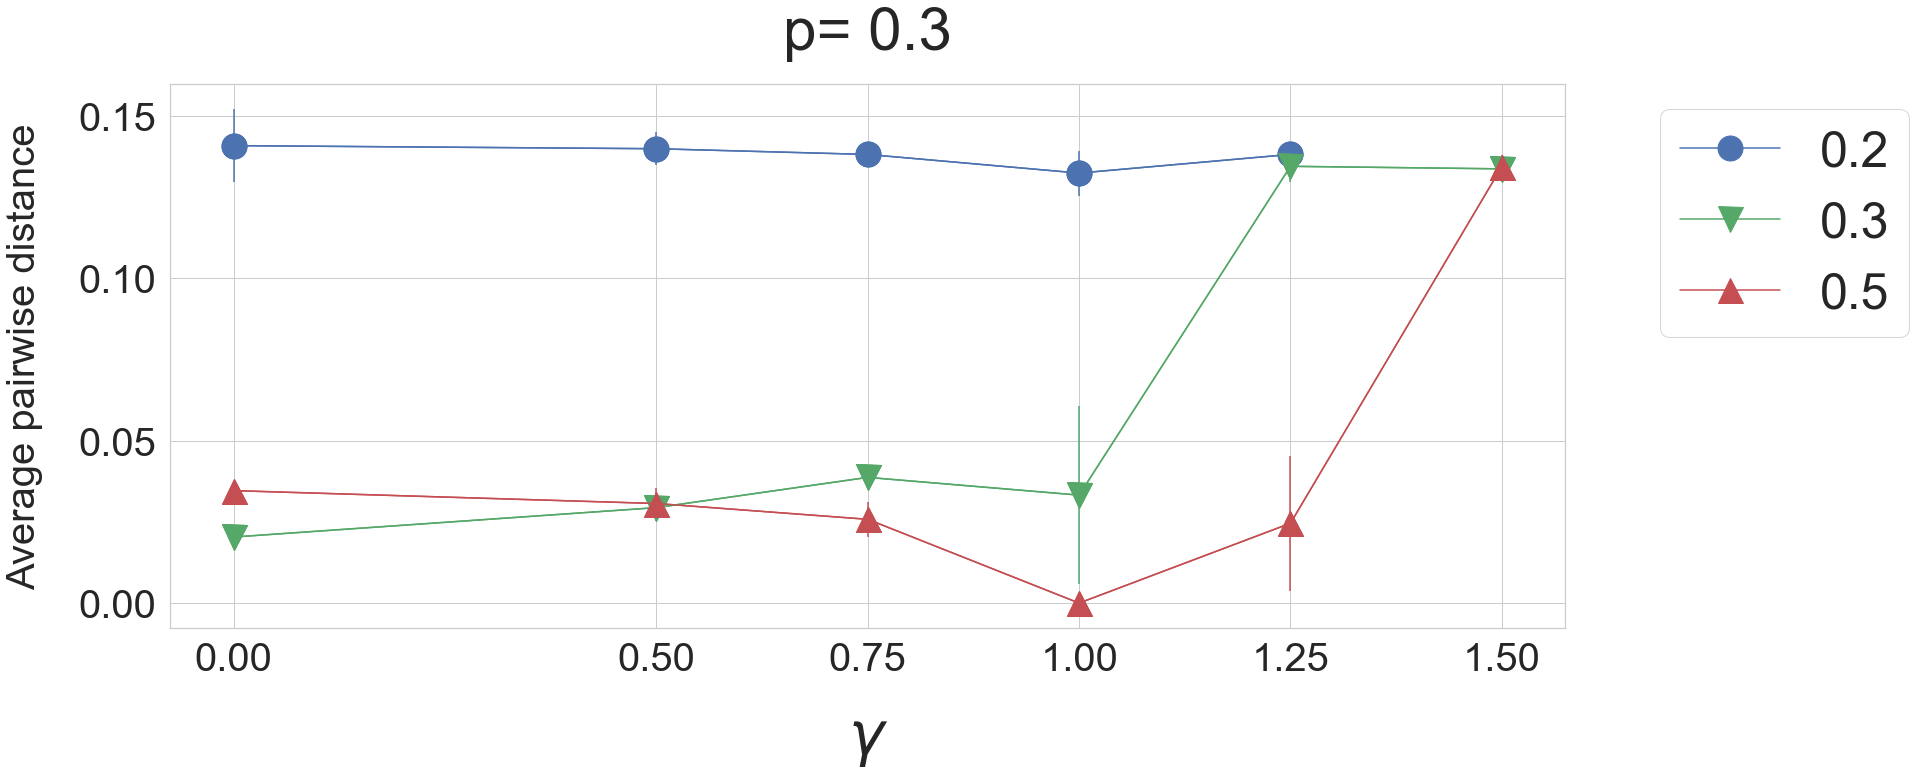

fixed_label = p, value = 0.5
0.2
0.3
0.5


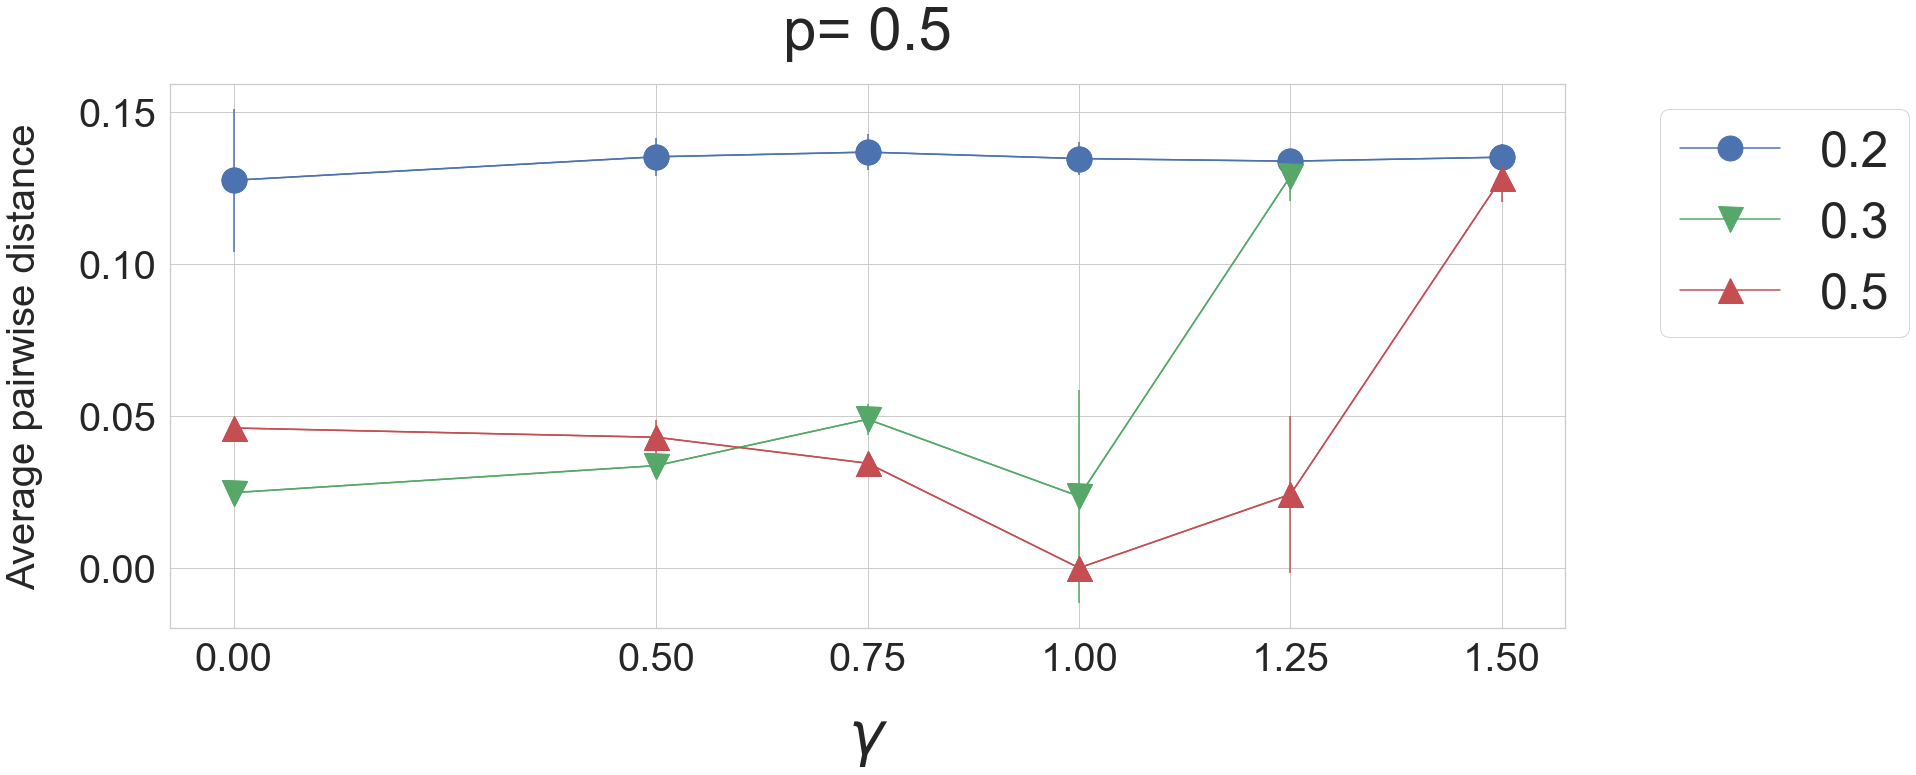

[0.2, 0.3, 0.5]
fixed_label = eps, value = 0.2
0.1
0.3
0.5


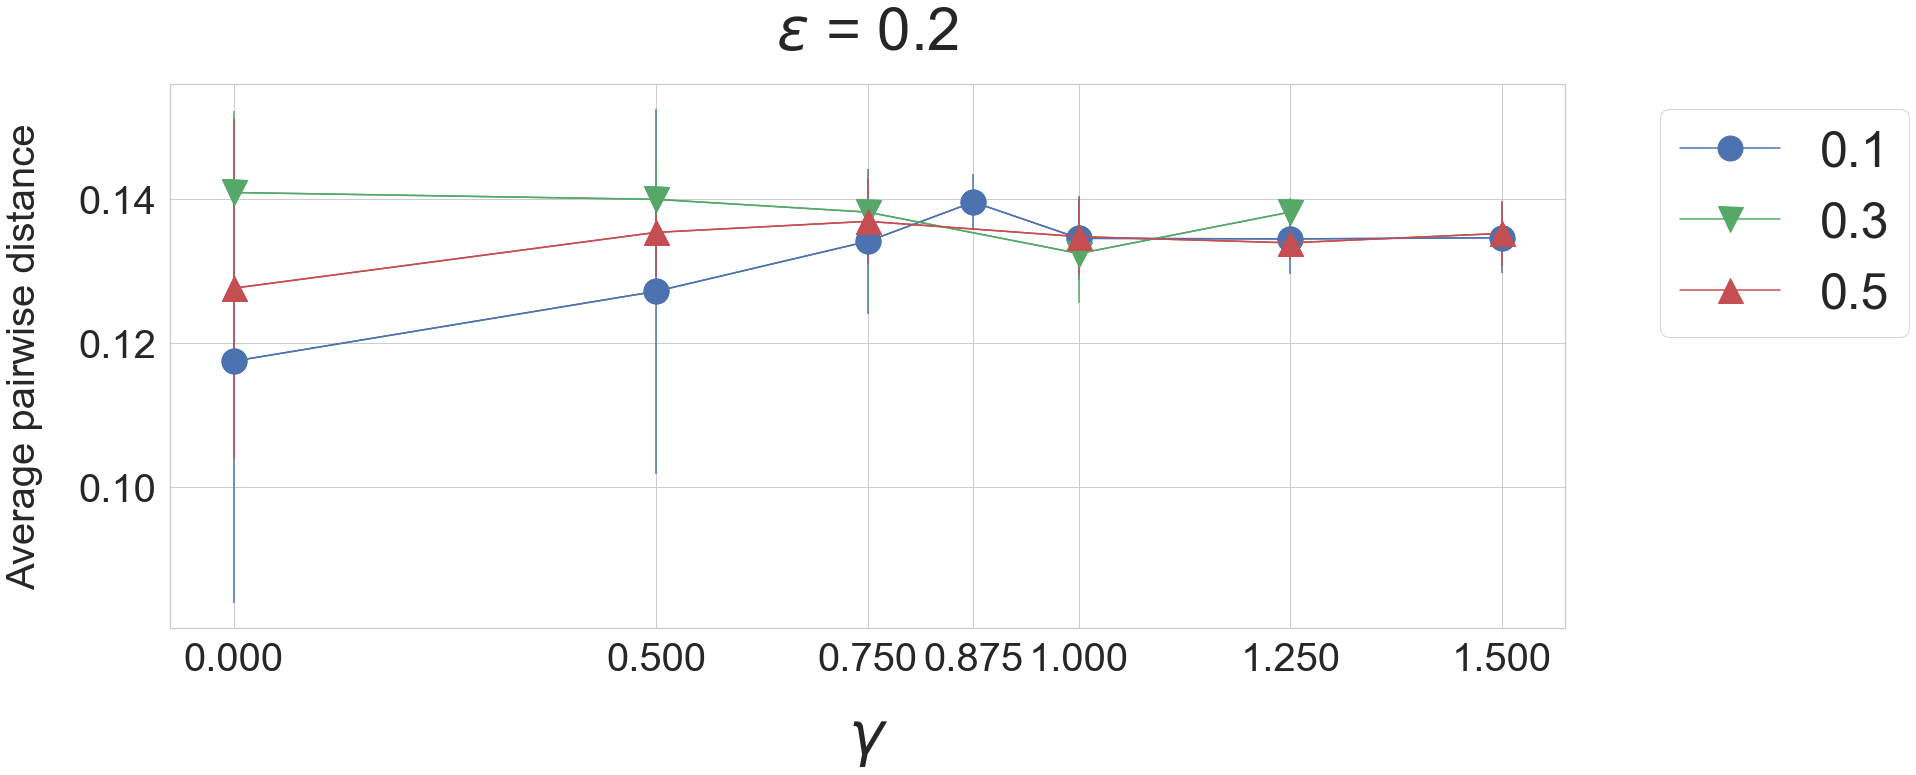

fixed_label = eps, value = 0.3
0.1
0.3
0.5


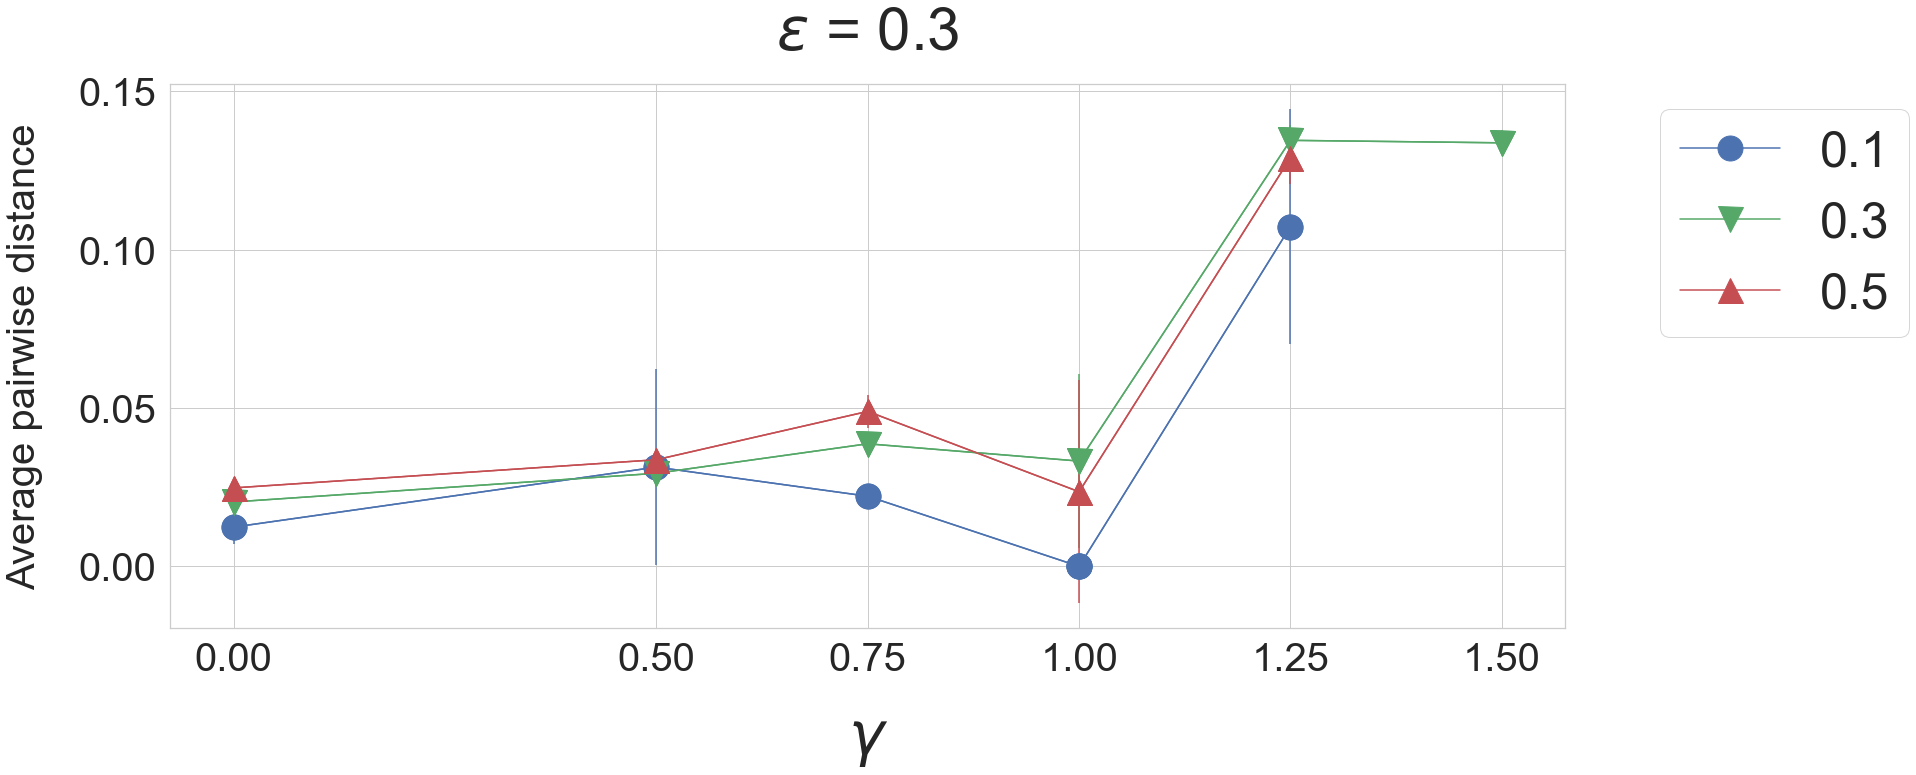

fixed_label = eps, value = 0.5
0.1
0.3
0.5


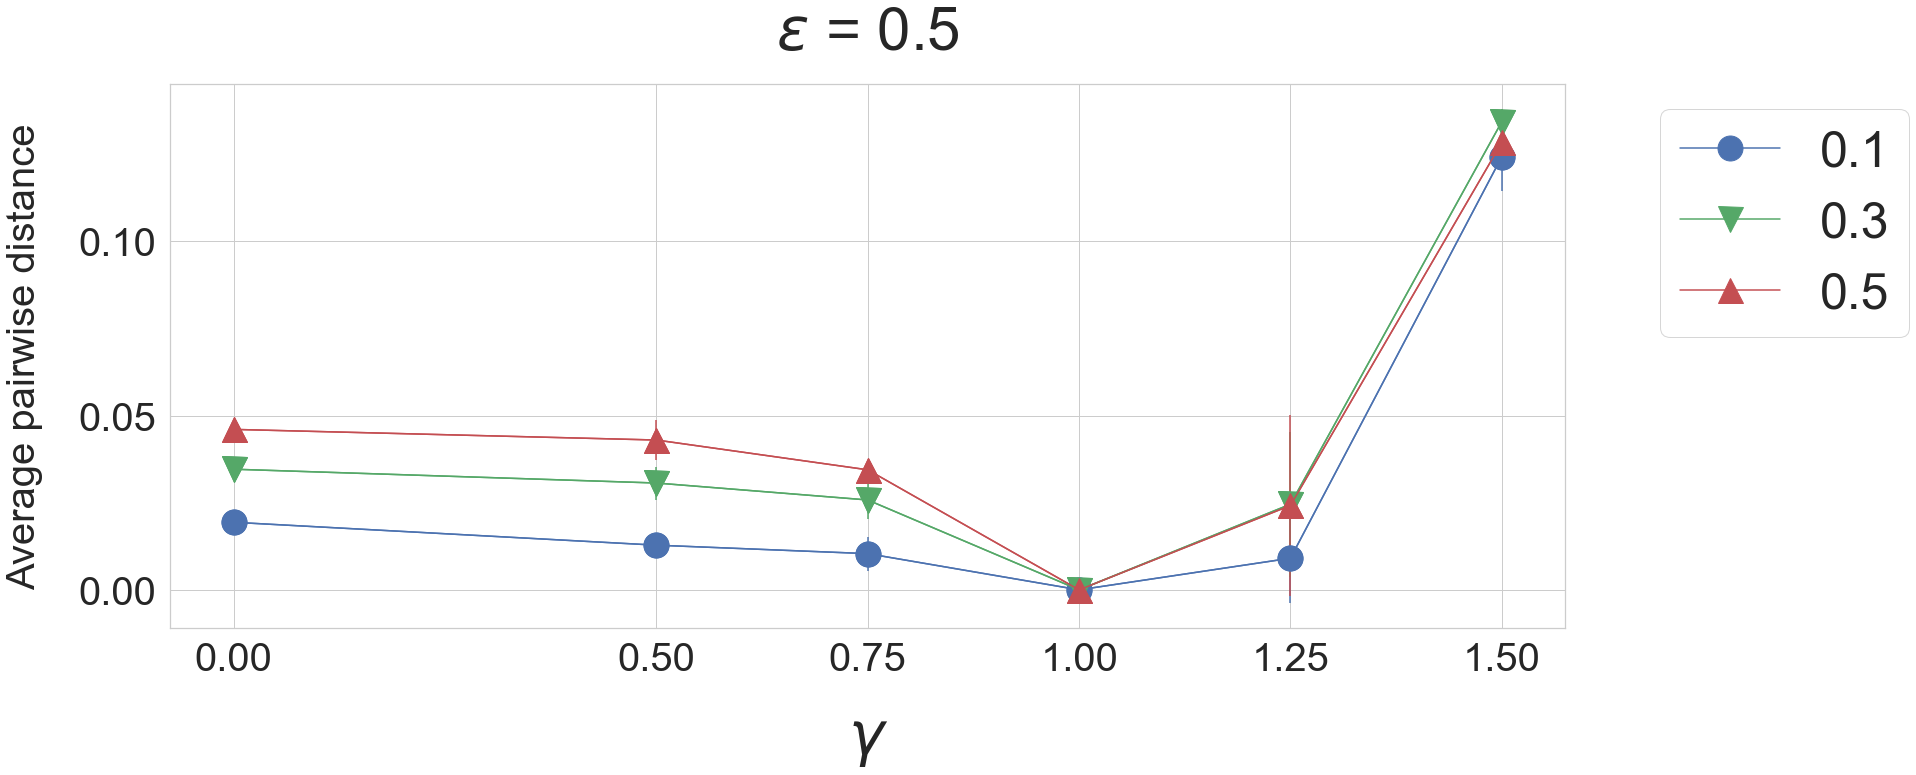

In [148]:
for measure in measures:
    for x_label in ['gam', 'eps', 'p']:
        for group_label in ['eps', 'p']:
            for fixed_label in ['eps', 'p']:
                if x_label != group_label and x_label != fixed_label and group_label != fixed_label:
                    plot2d(measure, x_label, group_label, fixed_label)
                    break            